# EDA Marketing Campaign Kelompok 2 (Laskar Online)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 10
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
df = pd.read_csv('marketing/marketing_campaign.csv', sep = ';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Pengamatan:

Data terdiri dari 2240 baris <br>
Tampak beberapa kolom masih memiliki null/missing values yaitu kolom : Income <br>
dt_customer adalah tanggal, maka sebaiknya diubah tipe datanya jadi date <br>

In [4]:
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'])

In [5]:
df['AcceptedCmp1']= df['AcceptedCmp1'].astype('bool')
df['AcceptedCmp2']= df['AcceptedCmp2'].astype('bool')
df['AcceptedCmp3']= df['AcceptedCmp3'].astype('bool')
df['AcceptedCmp4']= df['AcceptedCmp4'].astype('bool')
df['AcceptedCmp5']= df['AcceptedCmp5'].astype('bool')
df['Response']= df['Response'].astype('bool')
df['Complain']= df['Complain'].astype('bool')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [7]:
df.sample(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
331    663        1989         PhD         Single  33996.0        0         0   
803   9930        1944         PhD         Single  82716.0        0         0   
1765  9167        1956  Graduation        Married  67131.0        0         1   
981   3955        1965  Graduation       Divorced   4861.0        0         0   
234   3233        1965         PhD        Married  62745.0        0         1   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
331   2013-09-11       46        40  ...                  4         False   
803   2013-11-05        8       606  ...                  2         False   
1765  2013-03-26       72       465  ...                  6         False   
981   2014-06-22       20         2  ...                 14         False   
234   2013-03-23       89       562  ...                  5         False   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
331          False         False         False         False     False   
803          False         False         False         False     False   
1765         False         False         False         False     False   
981          False         False         False         False     False   
234          False         False         False         False     False   

      Z_CostContact  Z_Revenue  Response  
331               3         11     False  
803               3         11     False  
1765              3         11     False  
981               3         11     False  
234               3         11     False  

[5 rows x 29 columns]

## Statistical Summary

In [8]:
numericals = df.select_dtypes(include='number').columns
numericals = numericals.drop(['ID'])
categoricals = df.select_dtypes(include=['object', 'bool']).columns
time = ['Dt_Customer']
print(numericals)
print(categoricals)
print(time)

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Z_CostContact', 'Z_Revenue'],
      dtype='object')
Index(['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')
['Dt_Customer']


In [9]:
df[numericals].describe().T

count          mean           std     min       25%  \
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   

                         50%       75%       max  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0

jika mean dan median berbeda cukup jauh, bisa dianggap kemungkinan skew <br>
data yang mungkin skew : Income, Kidhome, Teenhome, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts <br>
terdapat nilai tidak umum pada nilai max kolom : income <br>
kolom yang ternyata boolean :AcceptedCmp3	AcceptedCmp4	AcceptedCmp5	AcceptedCmp1	AcceptedCmp2	Complain  Response <br>

nilai summary <br>
data yang mean dan median berbeda cukup jauh: Kidhome, Teenhome, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts <br>
nilai max yang tidak normal: income <br>

In [9]:
df[categoricals].describe()

Education Marital_Status AcceptedCmp3 AcceptedCmp4 AcceptedCmp5  \
count         2240           2240         2240         2240         2240   
unique           5              8            2            2            2   
top     Graduation        Married        False        False        False   
freq          1127            864         2077         2073         2077   

       AcceptedCmp1 AcceptedCmp2 Complain Response  
count          2240         2240     2240     2240  
unique            2            2        2        2  
top           False        False    False    False  
freq           2096         2210     2219     1906

In [10]:
for col in categoricals:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Education:
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Value count kolom Marital_Status:
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Value count kolom AcceptedCmp3:
False    2077
True      163
Name: AcceptedCmp3, dtype: int64

Value count kolom AcceptedCmp4:
False    2073
True      167
Name: AcceptedCmp4, dtype: int64

Value count kolom AcceptedCmp5:
False    2077
True      163
Name: AcceptedCmp5, dtype: int64

Value count kolom AcceptedCmp1:
False    2096
True      144
Name: AcceptedCmp1, dtype: int64

Value count kolom AcceptedCmp2:
False    2210
True       30
Name: AcceptedCmp2, dtype: int64

Value count kolom Complain:
False    2219
True       21
Name: Complain, dtype: int64

Value count kolom Response:
False    1906
True      334
Name: Response, dtype: int64



kurang lebih dari 50 % data education : graduation (timpang datanya) <br>

In [11]:
df[time].describe()

<ipython-input-11-796bf15cc90c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[time].describe()


Dt_Customer
count                  2240
unique                  663
top     2012-08-31 00:00:00
freq                     12
first   2012-07-30 00:00:00
last    2014-06-29 00:00:00

In [12]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

data income memiliki nilai null, namun karena sedikit, bisa dihapus atau imputasi dengan nilai median income

## Plotting Data, Visualisasi Sederhana

### Data Numerik

In [13]:
numericals

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Z_CostContact', 'Z_Revenue'],
      dtype='object')

In [14]:
numericals1 = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency']
numericals1

['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency']

In [15]:
numericals2 = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
numericals2

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [16]:
numericals3 = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
               'NumWebVisitsMonth']
numericals3

['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

mean > median : positif <br>
mean < median : negatif

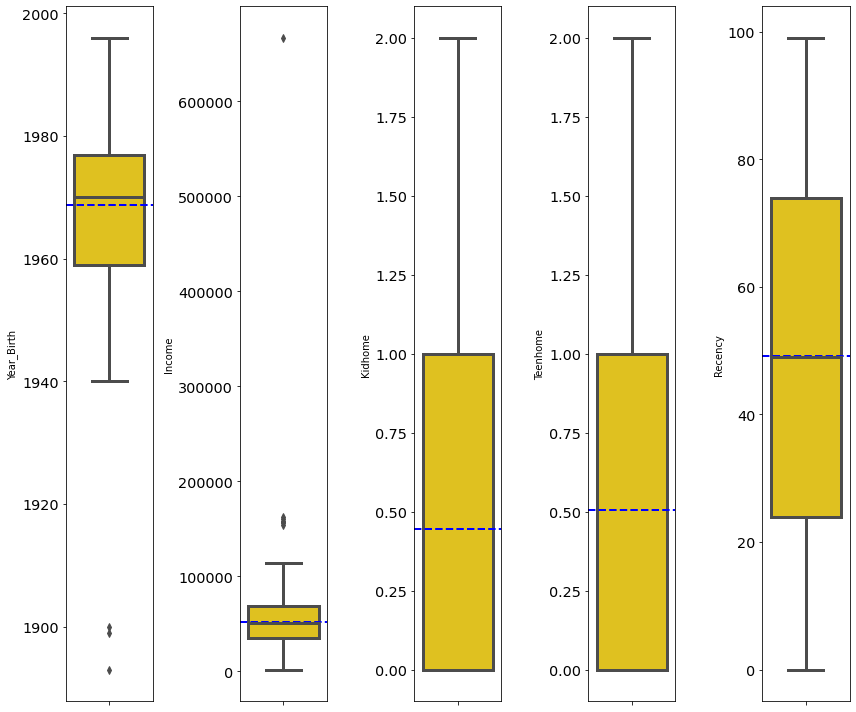

In [17]:
for i in range(0, len(numericals1)):
    plt.subplot(1, len(numericals1), i+1)
    sns.boxplot(y=df[numericals1[i]], color='gold', orient='v')
    plt.axhline(df[numericals1[i]].mean(), color='blue', linestyle='dashed', linewidth=2)
    plt.tight_layout()

outliers yang mungkin perlu dihapus : tahun lahir, income <br>
Distribusi Data : <br>
year_birth, mean < median : negatif skew <br>
income, mean hampir mendekati median, bisa dianggap normal <br>
else : distribusinormal

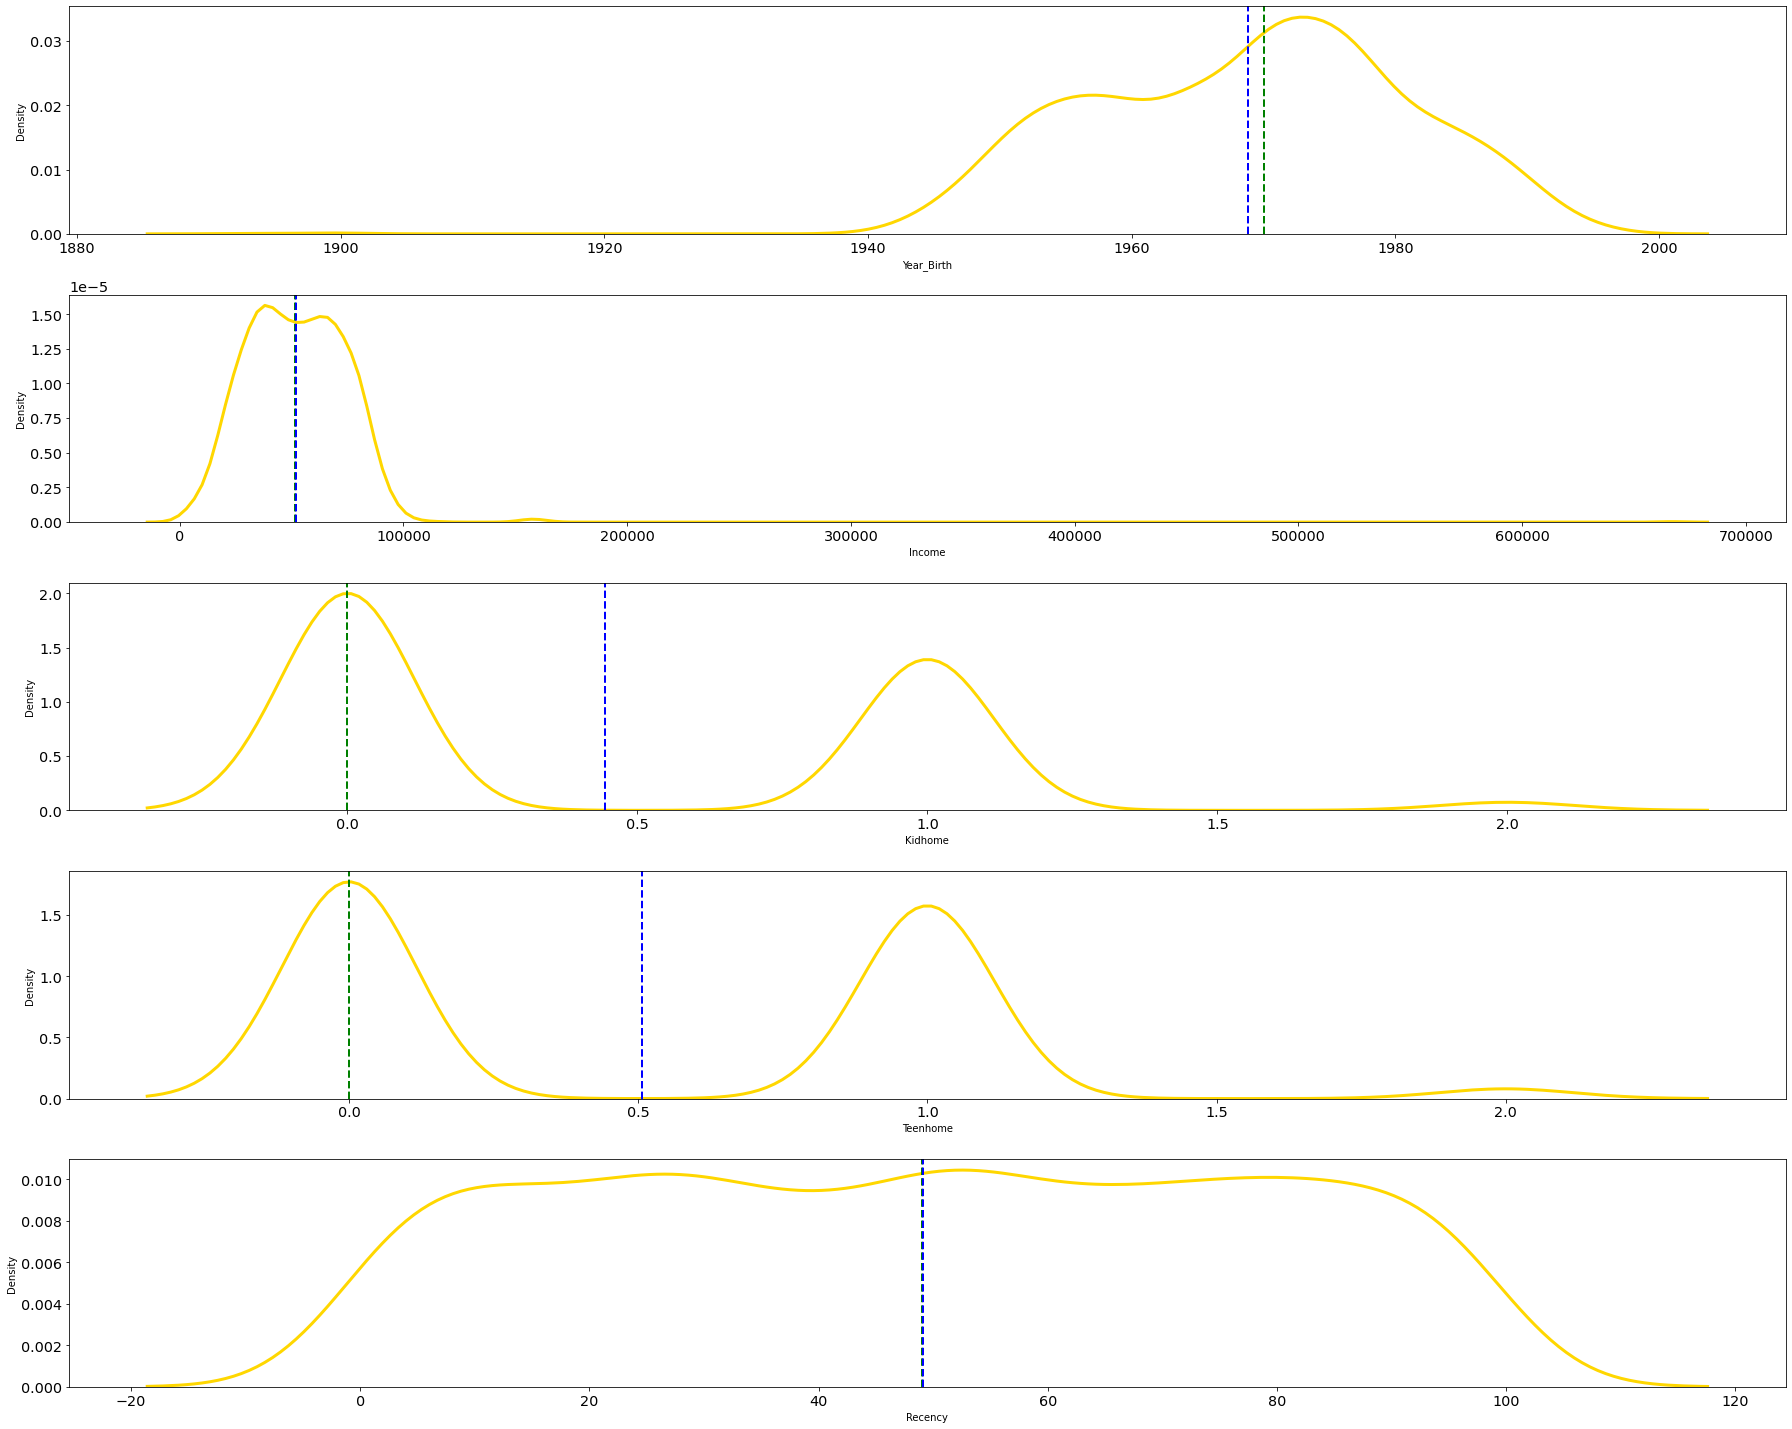

In [18]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(numericals1)):
    ax = fig.add_subplot(5, 1, i+1)
    sns.kdeplot(df[numericals1[i]], color='gold')
    plt.axvline(df[numericals1[i]].quantile(0.5), color='green', linestyle='dashed', linewidth=2)
    plt.axvline(df[numericals1[i]].mean(), color='blue', linestyle='dashed', linewidth=2)
    plt.tight_layout()

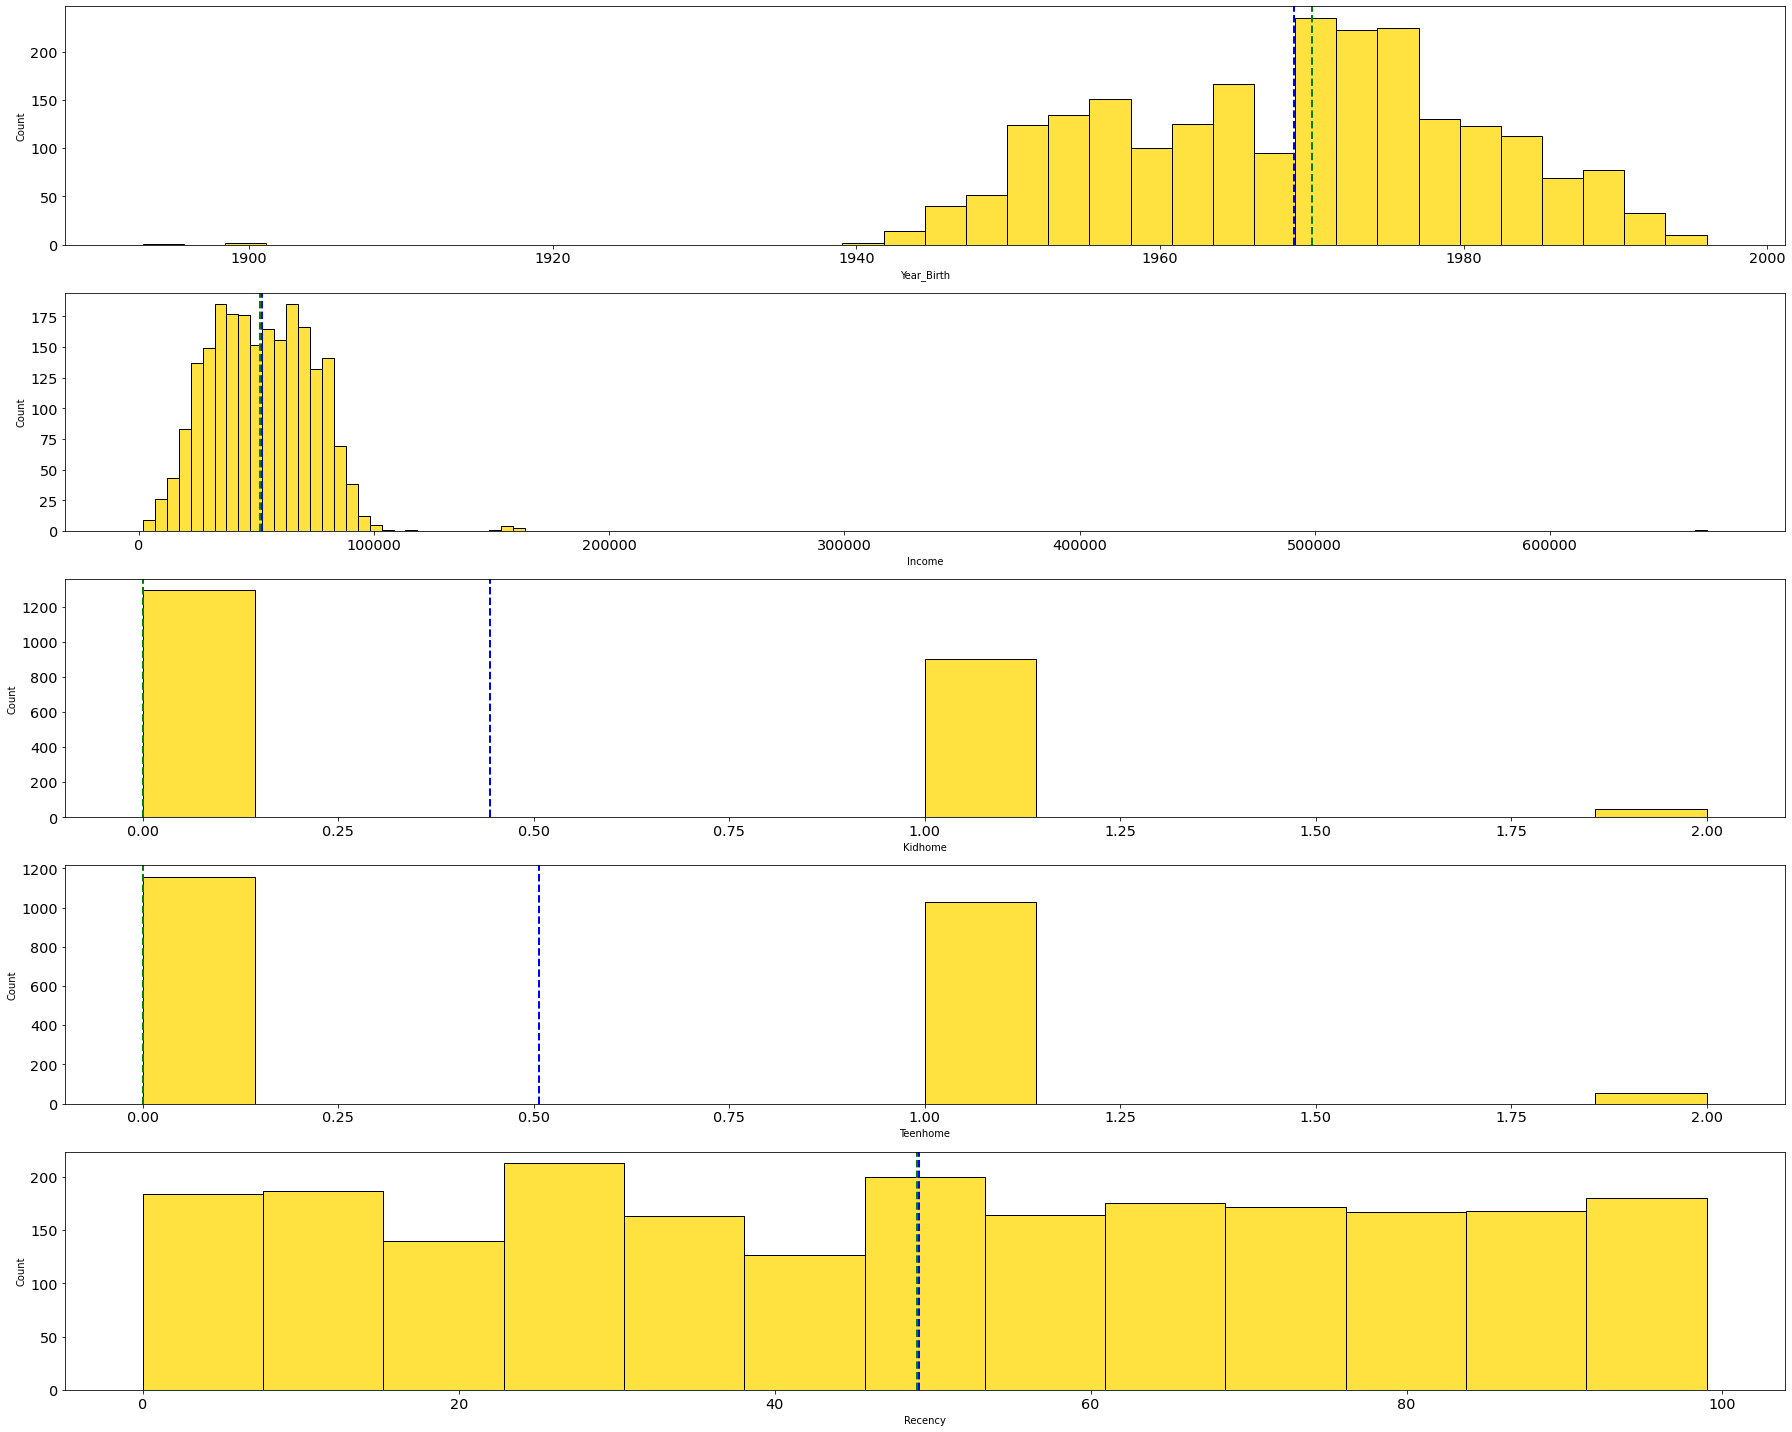

In [19]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(numericals1)):
    ax = fig.add_subplot(5, 1, i+1)
    sns.histplot(df[numericals1[i]], color='gold')
    plt.axvline(df[numericals1[i]].quantile(0.5), color='green', linestyle='dashed', linewidth=2)
    plt.axvline(df[numericals1[i]].mean(), color='blue', linestyle='dashed', linewidth=2)
    plt.tight_layout()

Distribusi Data : <br>
year_birth, mean terlihat hampir sama dengan median, tetapi dari boxplot diketahui : negatif skew <br>
income, mean hampir mendekati median, bisa dianggap normal, grafik cendrung kekiri karena outliers <br>
kidhome, teenhome : bimodal
recency : normal

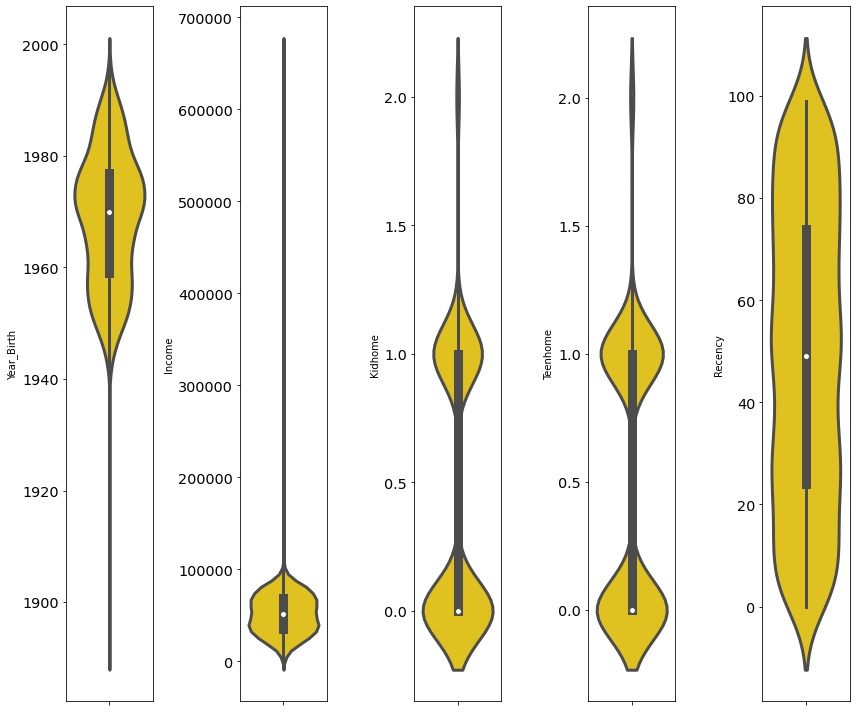

In [20]:
for i in range(0, len(numericals1)):
    plt.subplot(1, len(numericals1), i+1)
    sns.violinplot(y=df[numericals1[i]], color='gold', orient='v')
    plt.tight_layout()

persebaran data : <br>
year_birth : menumpuk di 1940 - 2000 <br>
income : menumpuk 0 - 100000 <br>
kidhome, teenhome : 0, 1 <br>
recency : merata

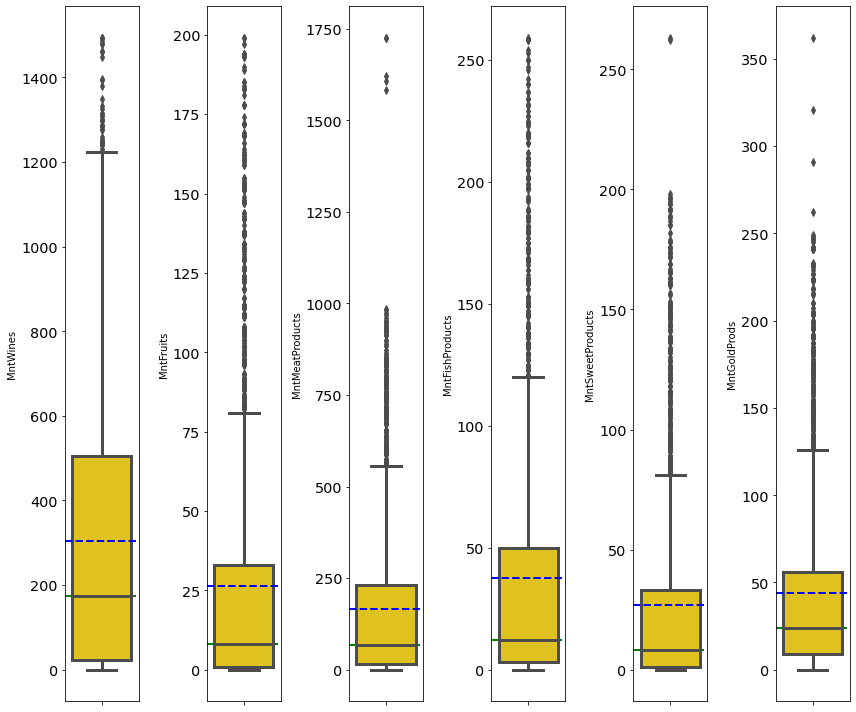

In [21]:
for i in range(0, len(numericals2)):
    plt.subplot(1, len(numericals2), i+1)
    sns.boxplot(y=df[numericals2[i]], color='gold', orient='v')
    plt.axhline(df[numericals2[i]].quantile(0.5), color='green', linestyle='dashed', linewidth=2)
    plt.axhline(df[numericals2[i]].mean(), color='blue', linestyle='dashed', linewidth=2)
    plt.tight_layout()

Terdapat Outliers pada mnt seluruh produk <br>
seluruh produk : mean > median, positif skew

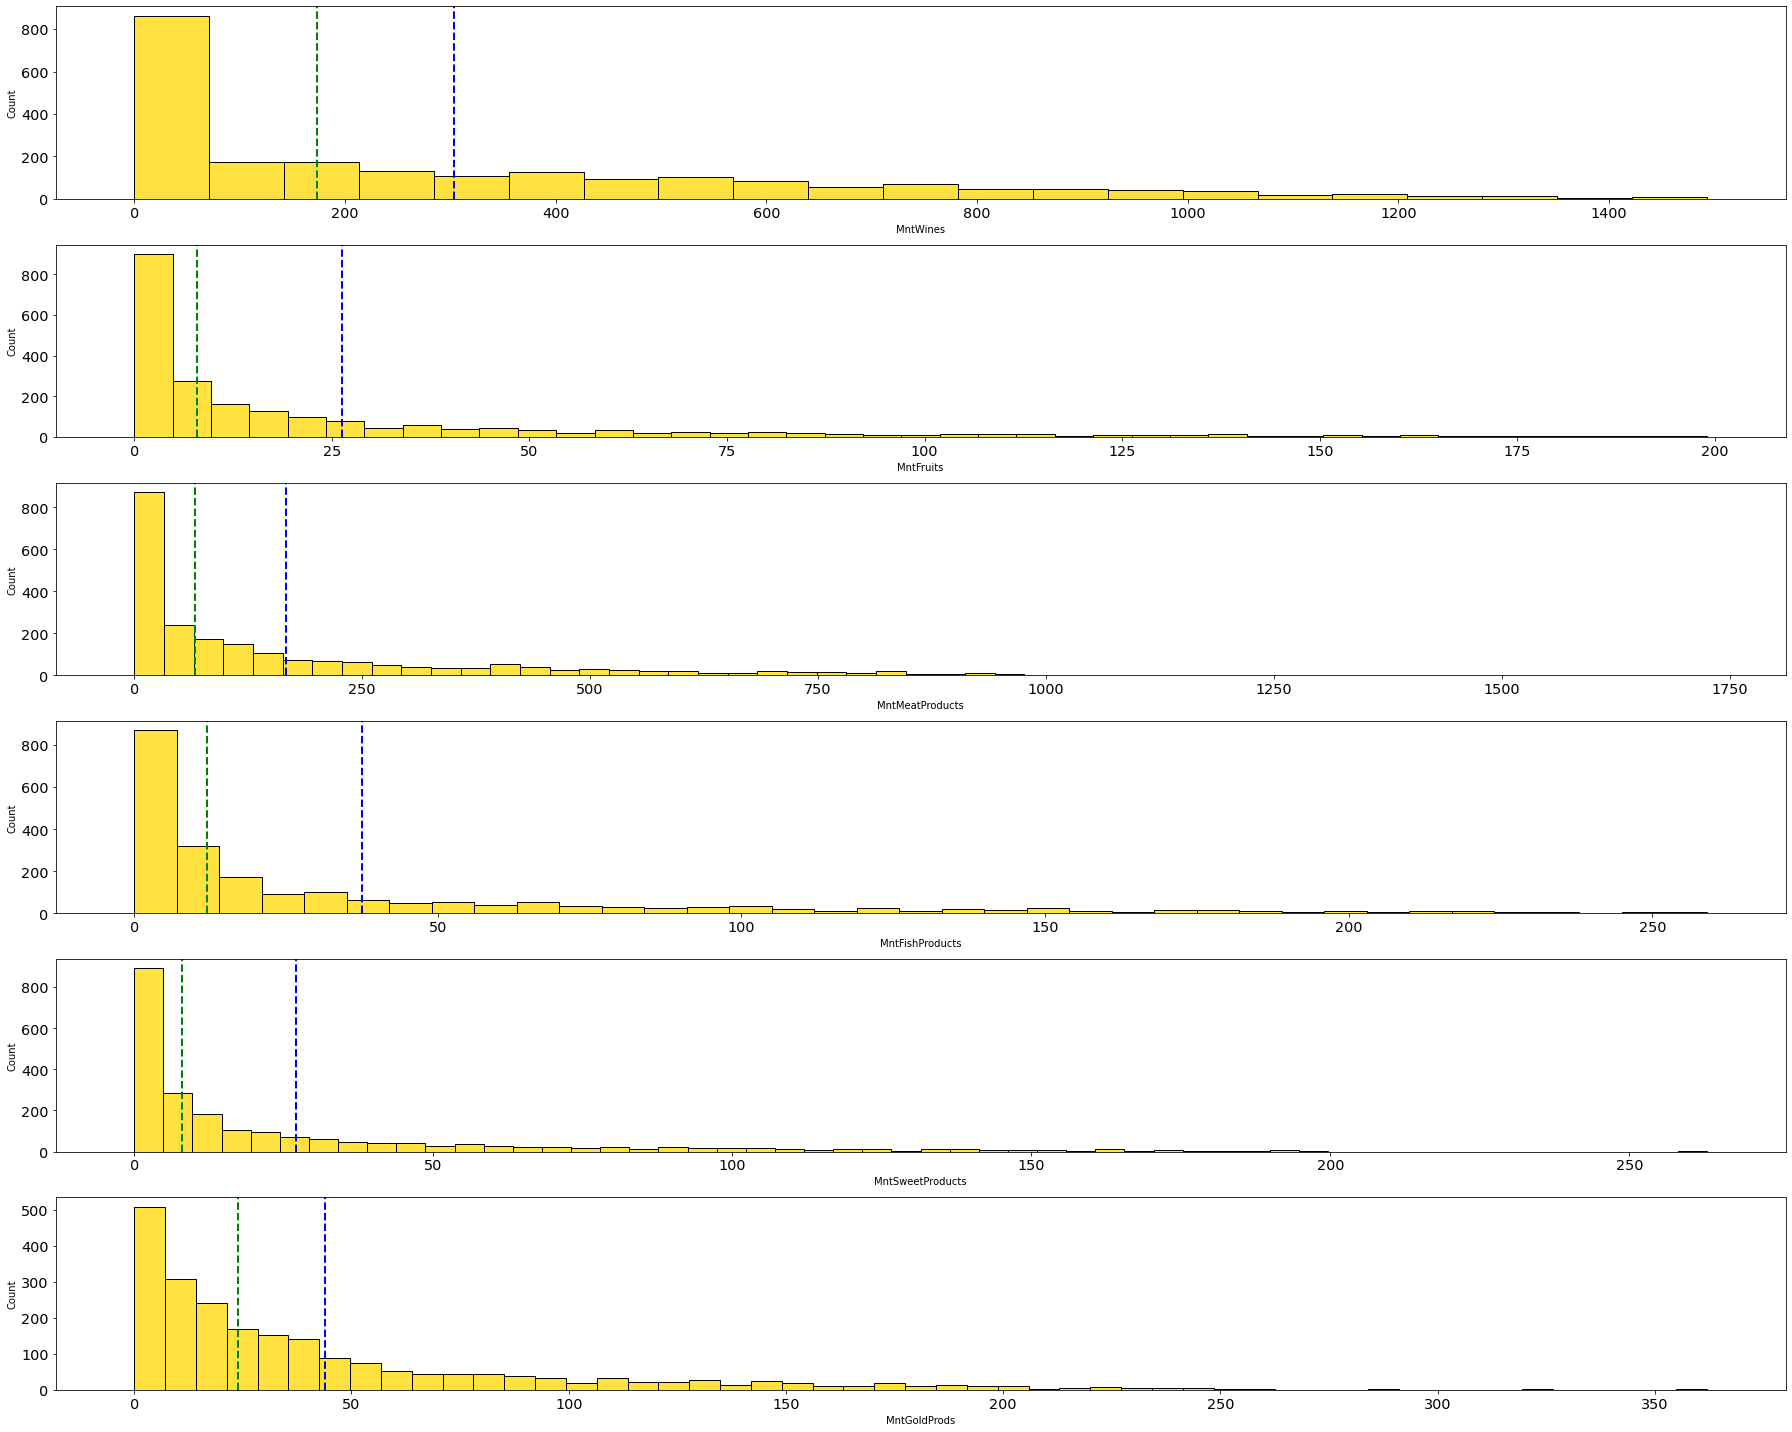

In [22]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(numericals2)):
    ax = fig.add_subplot(6, 1, i+1)
    sns.histplot(df[numericals2[i]], color='gold')
    plt.axvline(df[numericals2[i]].quantile(0.5), color='green', linestyle='dashed', linewidth=2)
    plt.axvline(df[numericals2[i]].mean(), color='blue', linestyle='dashed', linewidth=2)
    plt.tight_layout()

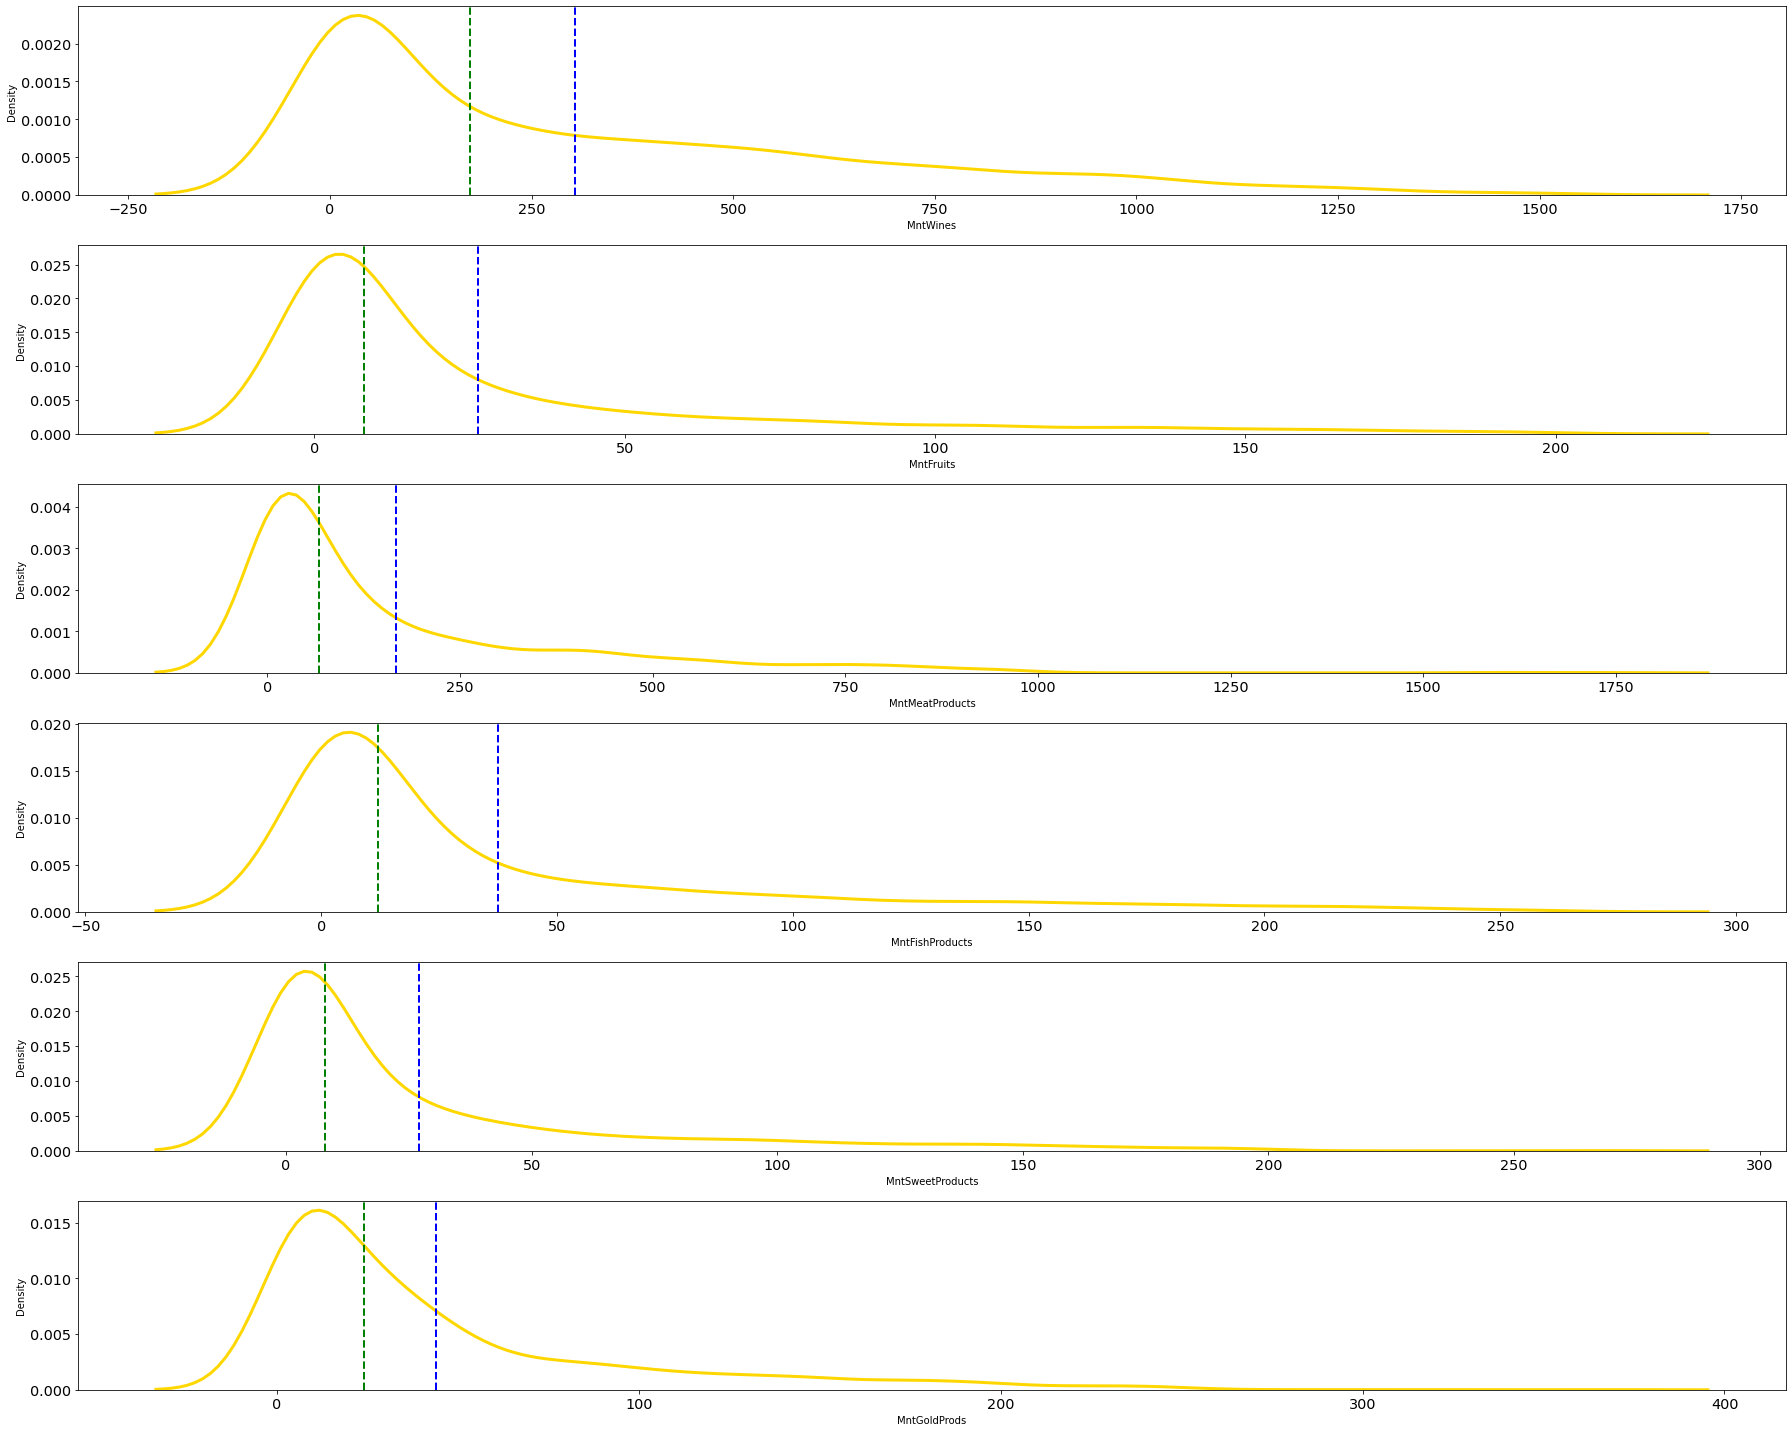

In [23]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(numericals2)):
    ax = fig.add_subplot(6, 1, i+1)
    sns.kdeplot(df[numericals2[i]], color='gold')
    plt.axvline(df[numericals2[i]].quantile(0.5), color='green', linestyle='dashed', linewidth=2)
    plt.axvline(df[numericals2[i]].mean(), color='blue', linestyle='dashed', linewidth=2)
    plt.tight_layout()

semua mnt produk positif skew

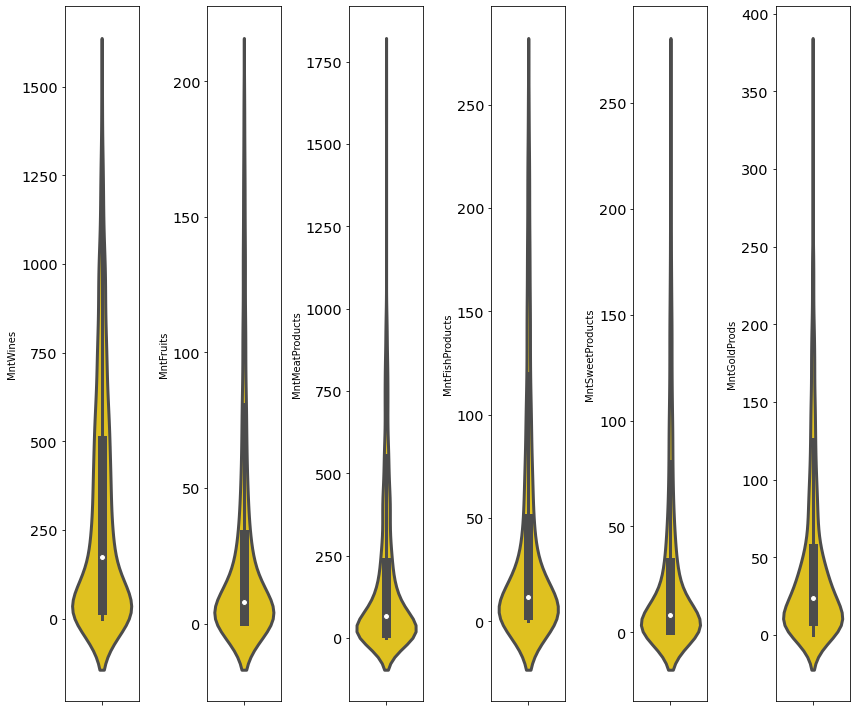

In [24]:
for i in range(0, len(numericals2)):
    plt.subplot(1, len(numericals2), i+1)
    sns.violinplot(y=df[numericals2[i]], color='gold', orient='v')
    plt.tight_layout()

semua produk, menumpuk di awal data, atau jumlah rendah

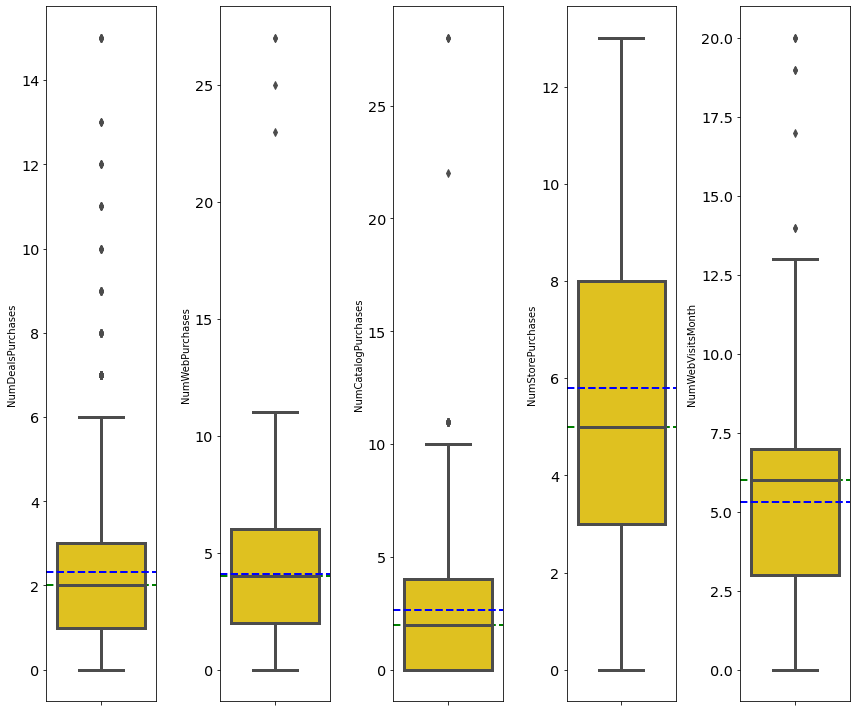

In [25]:
for i in range(0, len(numericals3)):
    plt.subplot(1, len(numericals3), i+1)
    sns.boxplot(y=df[numericals3[i]], color='gold', orient='v')
    plt.axhline(df[numericals3[i]].quantile(0.5), color='green', linestyle='dashed', linewidth=2)
    plt.axhline(df[numericals3[i]].mean(), color='blue', linestyle='dashed', linewidth=2)
    plt.tight_layout()

terdapat outliers, kecuali pada numstore purchase <br>
distribusi data : <br>
numwebvisitmonth : mean < median, negatif skew <br>
numwebpurchase : mean hampir sama dengan median, bisa dianggap normal <br>
selain itu : mean > median, positif skew

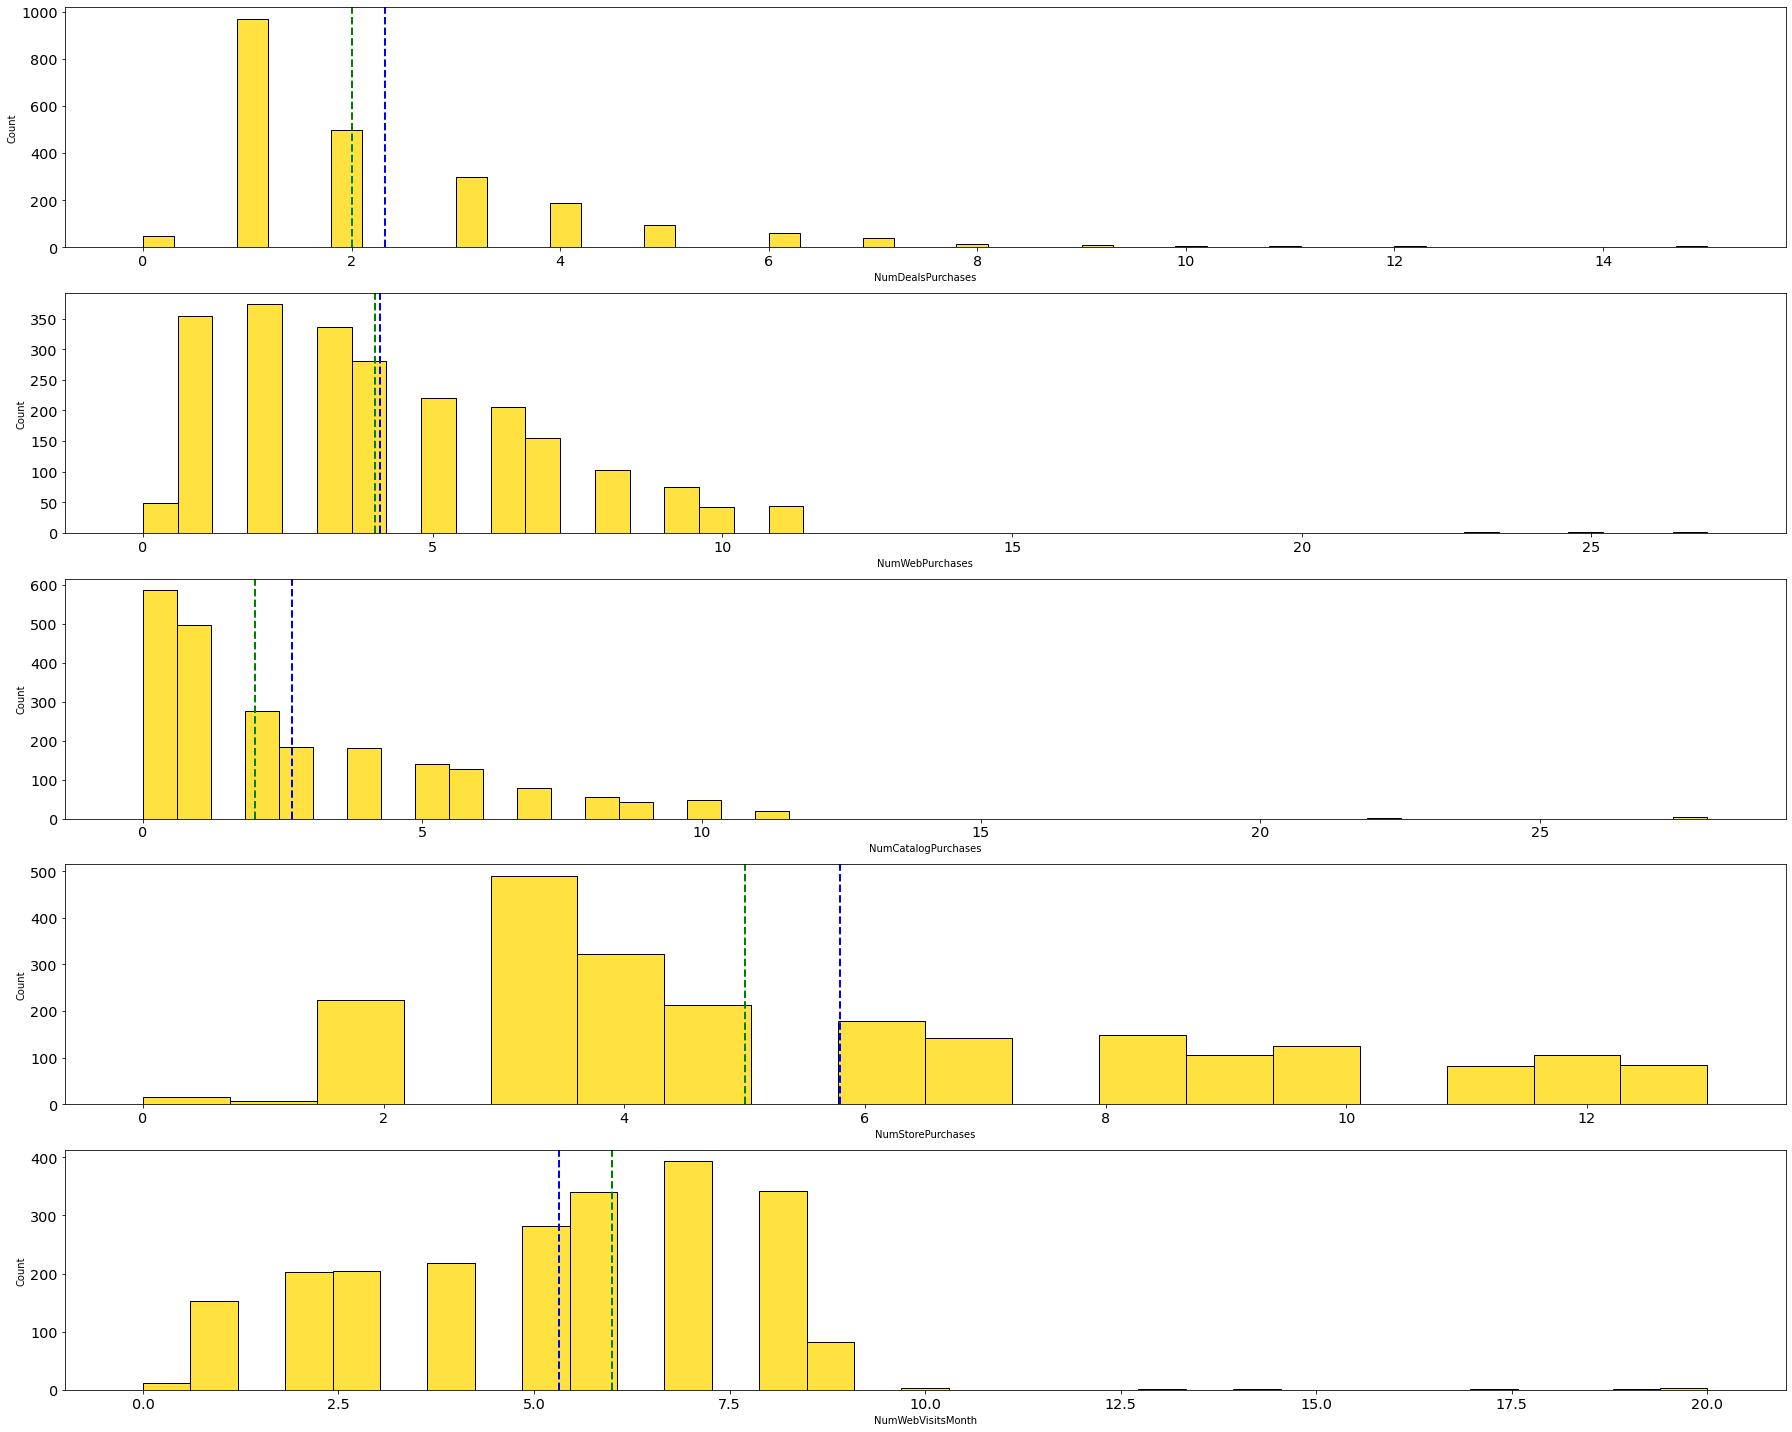

In [26]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(numericals3)):
    ax = fig.add_subplot(5, 1, i+1)
    sns.histplot(df[numericals3[i]], color='gold')
    plt.axvline(df[numericals3[i]].quantile(0.5), color='green', linestyle='dashed', linewidth=2)
    plt.axvline(df[numericals3[i]].mean(), color='blue', linestyle='dashed', linewidth=2)
    plt.tight_layout()

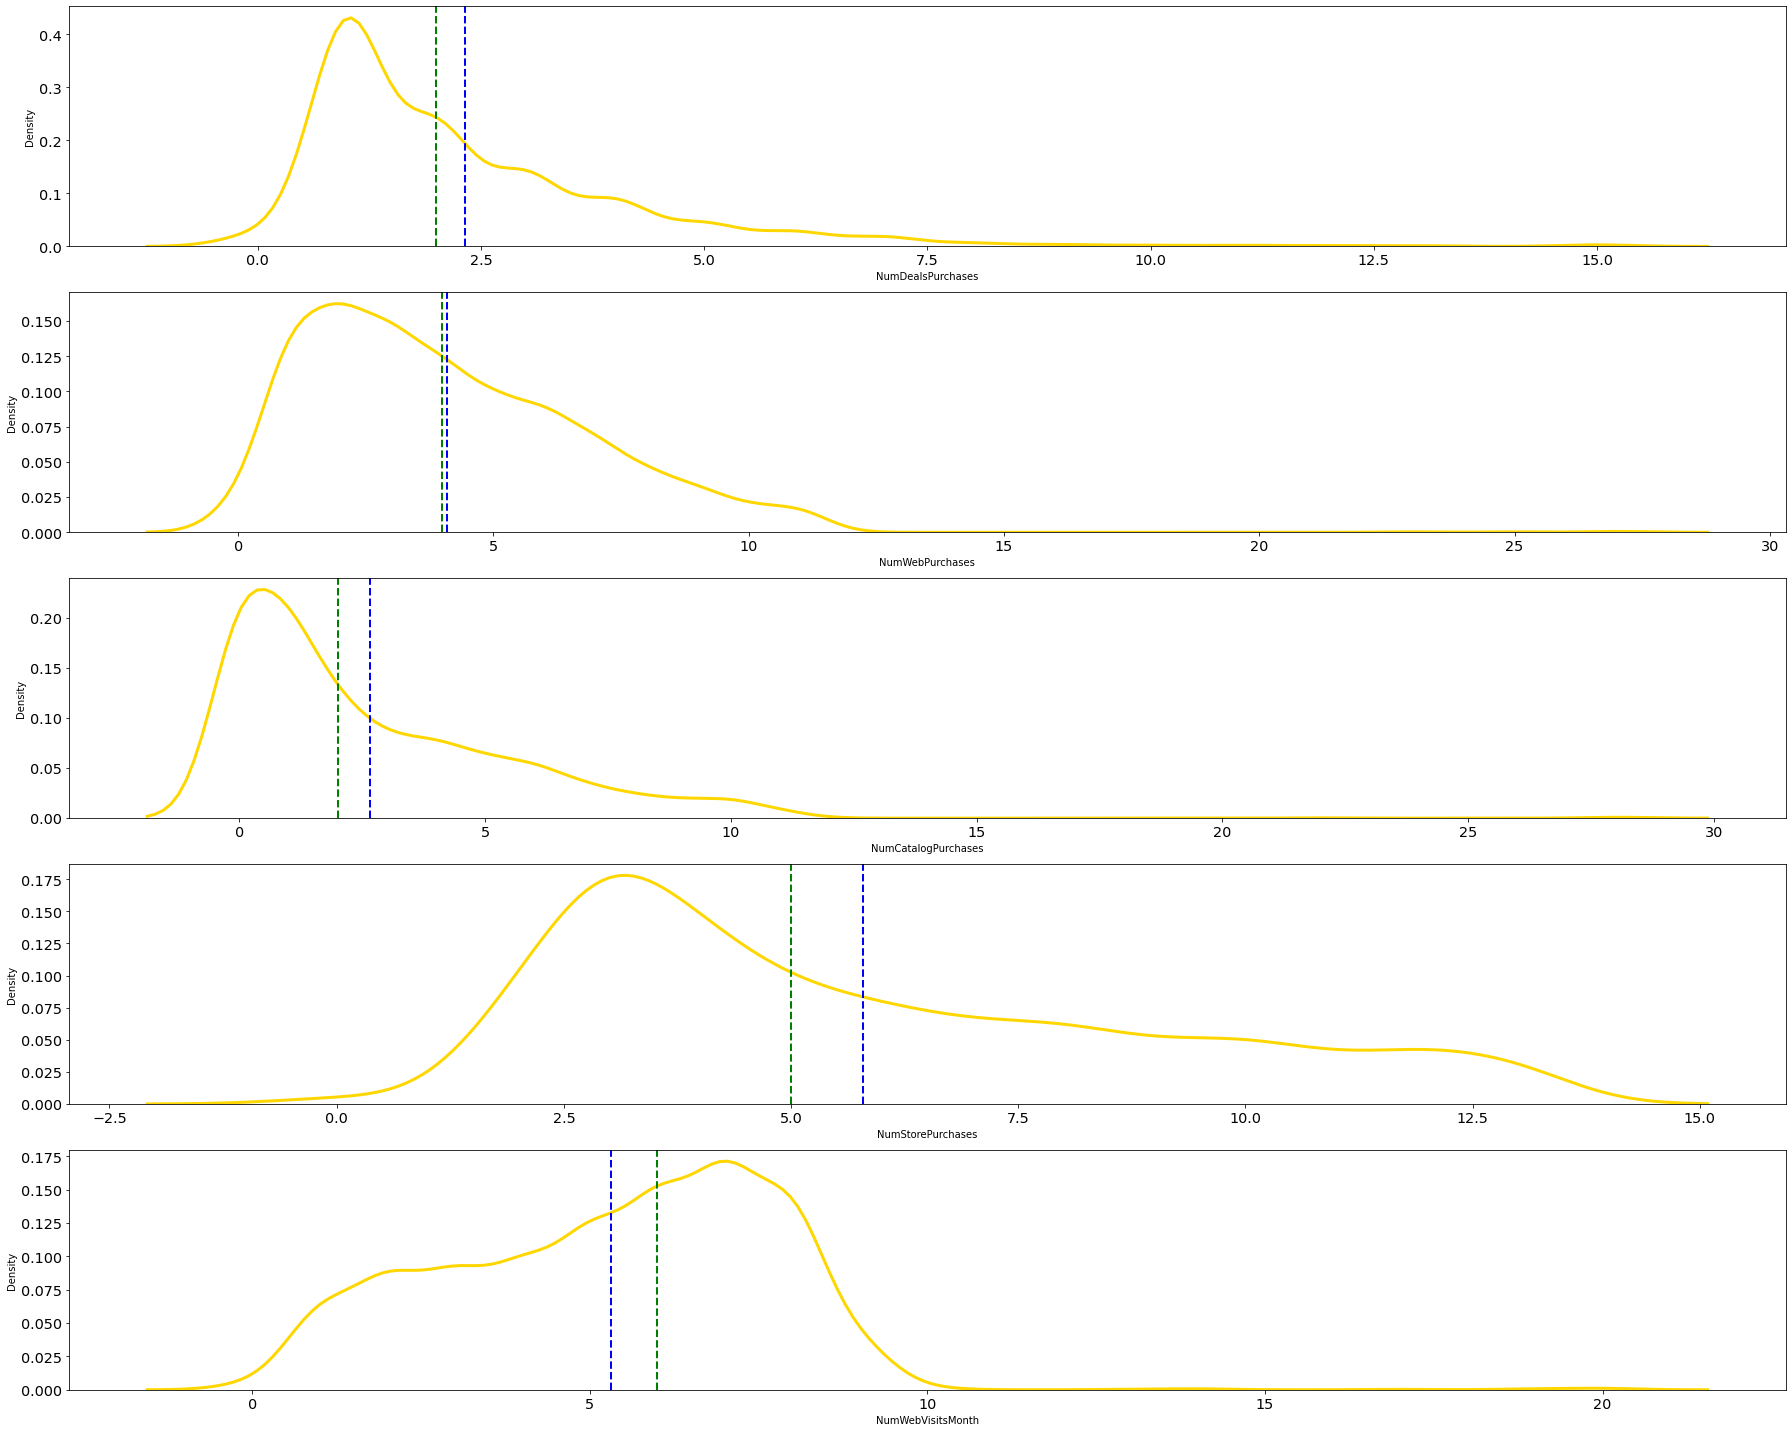

In [27]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(numericals3)):
    ax = fig.add_subplot(5, 1, i+1)
    sns.kdeplot(df[numericals3[i]], color='gold')
    plt.axvline(df[numericals3[i]].quantile(0.5), color='green', linestyle='dashed', linewidth=2)
    plt.axvline(df[numericals3[i]].mean(), color='blue', linestyle='dashed', linewidth=2)
    plt.tight_layout()

distribusi data : <br>
numwebvisitmonth : mean < median, negatif skew <br>
numwebpurchase : mean hampir sama dengan median, bisa dianggap normal <br>
selain itu : mean > median, positif skew

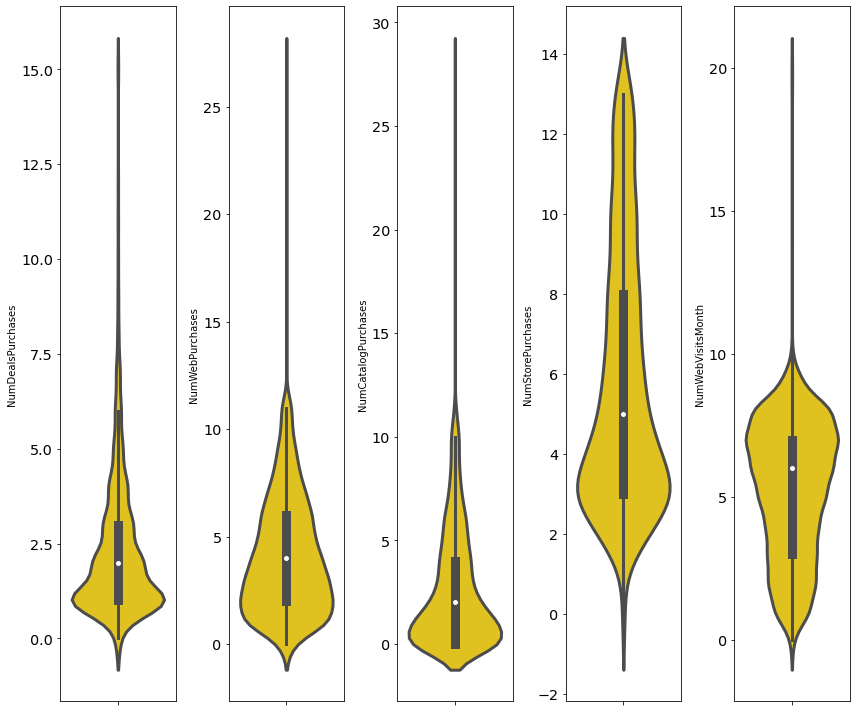

In [28]:
for i in range(0, len(numericals3)):
    plt.subplot(1, len(numericals3), i+1)
    sns.violinplot(y=df[numericals3[i]], color='gold', orient='v')
    plt.tight_layout()

### Data Categorik

In [29]:
categoricals

Index(['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-p

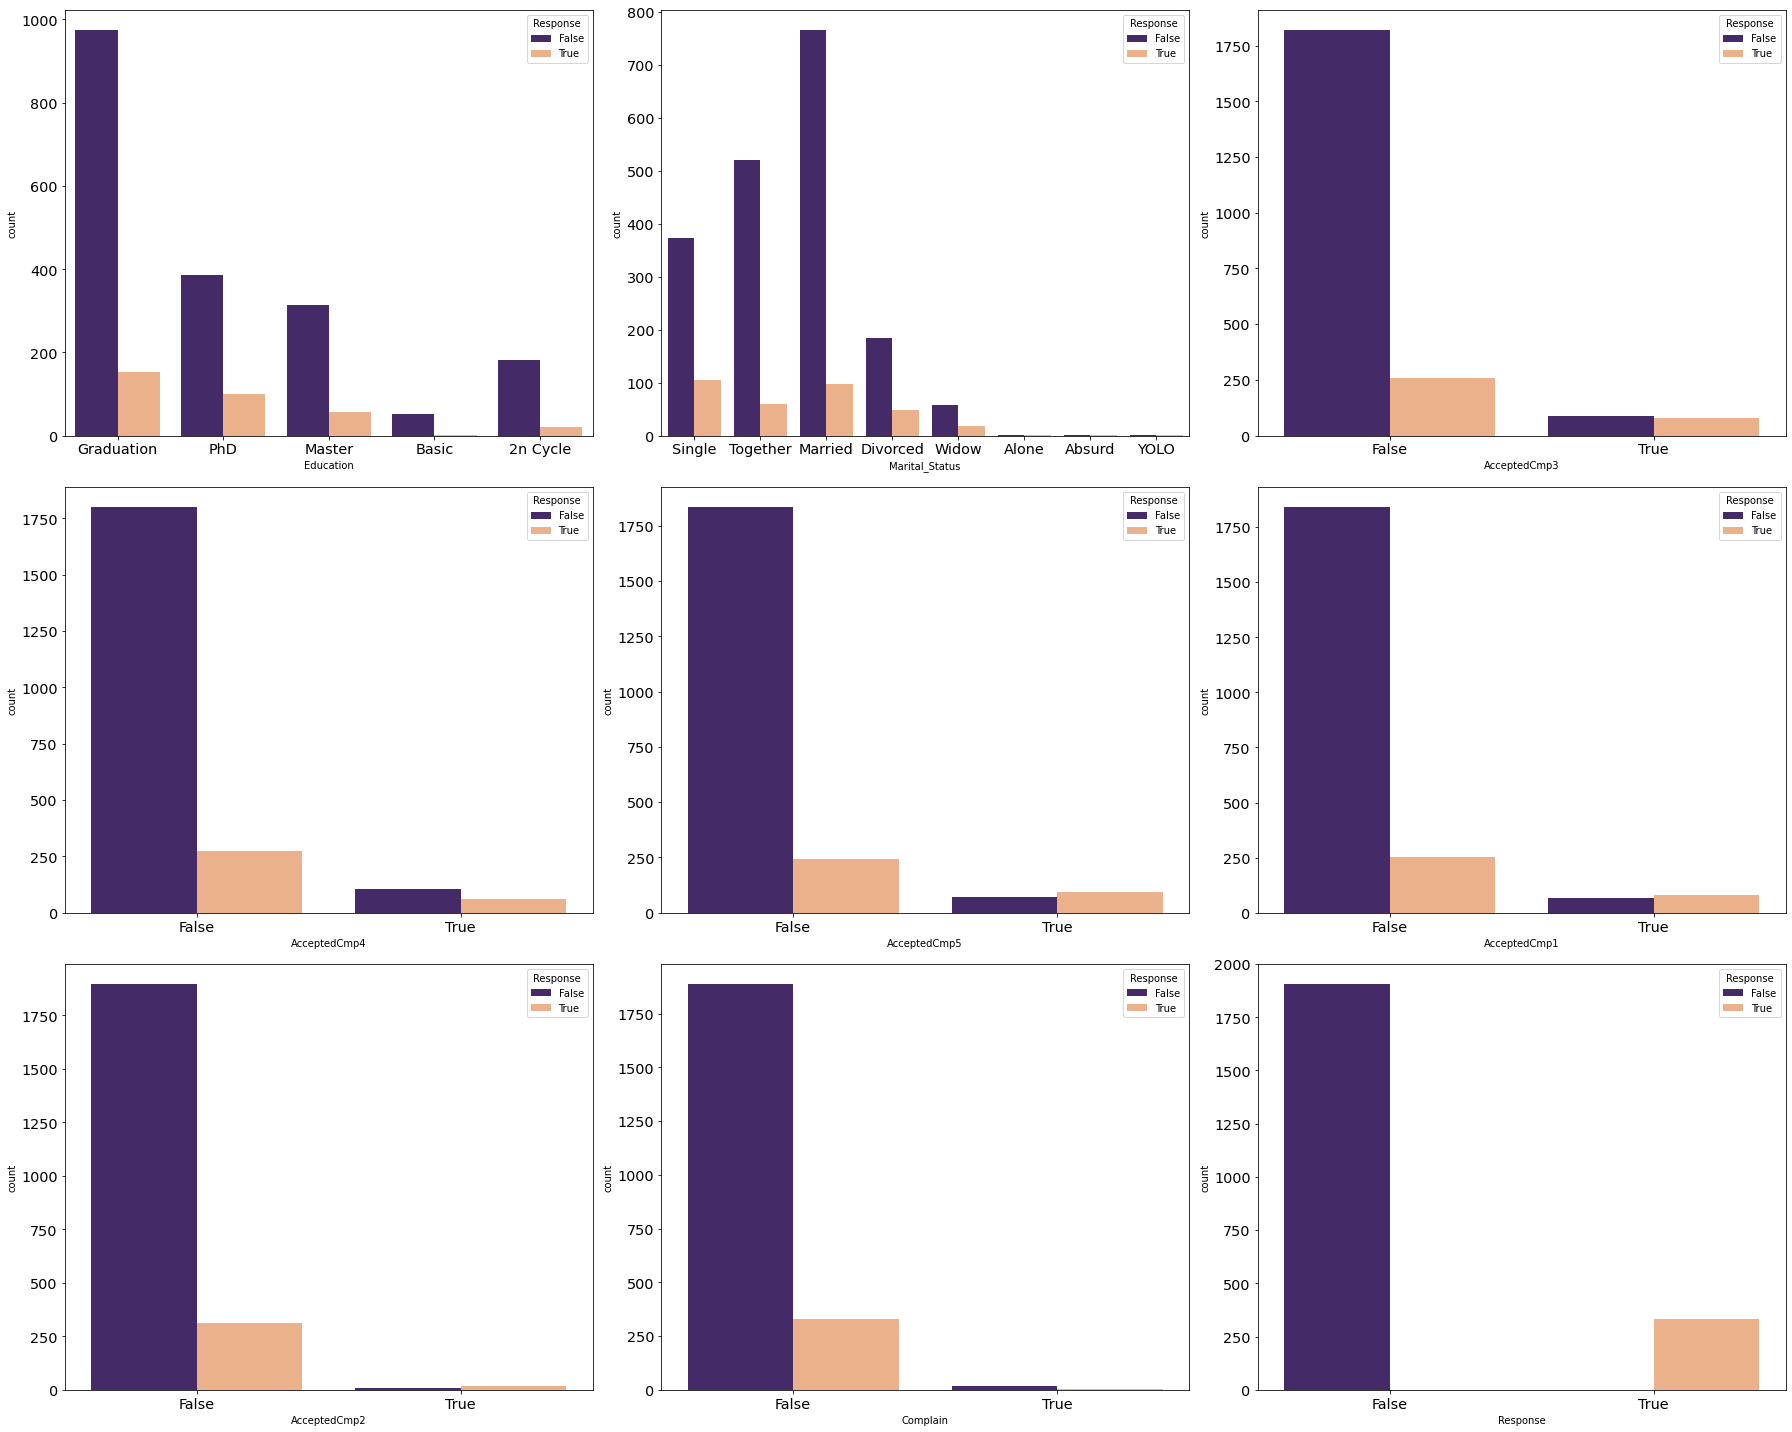

In [30]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(categoricals)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.countplot(df[categoricals[i]],palette=['#432071',"#FAAE7B"], hue = df['Response'], orient='h')
    plt.tight_layout()

### Korelasi Data

In [31]:
numericals

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Z_CostContact', 'Z_Revenue'],
      dtype='object')

In [32]:
numericals6 = numericals.drop(['Z_CostContact', 'Z_Revenue'])

In [33]:
df[numericals6].corr()

Year_Birth    Income   Kidhome  Teenhome   Recency  \
Year_Birth             1.000000 -0.161791  0.230176 -0.352111 -0.019871   
Income                -0.161791  1.000000 -0.428669  0.019133 -0.003970   
Kidhome                0.230176 -0.428669  1.000000 -0.036133  0.008827   
Teenhome              -0.352111  0.019133 -0.036133  1.000000  0.016198   
Recency               -0.019871 -0.003970  0.008827  0.016198  1.000000   
MntWines              -0.157773  0.578650 -0.496297  0.004846  0.016064   
MntFruits             -0.017917  0.430842 -0.372581 -0.176764 -0.004306   
MntMeatProducts       -0.030872  0.584633 -0.437129 -0.261160  0.023056   
MntFishProducts       -0.041625  0.438871 -0.387644 -0.204187  0.001079   
MntSweetProducts      -0.018133  0.440744 -0.370673 -0.162475  0.022670   
MntGoldProds          -0.061818  0.325916 -0.349595 -0.021725  0.016693   
NumDealsPurchases     -0.060846 -0.083101  0.221798  0.387741 -0.001098   
NumWebPurchases       -0.145040  0.387878 -0.361647  0.155500 -0.010726   
NumCatalogPurchases   -0.121275  0.589162 -0.502237 -0.110769  0.025110   
NumStorePurchases     -0.128272  0.529362 -0.499683  0.050695  0.000799   
NumWebVisitsMonth      0.121139 -0.553088  0.447846  0.134884 -0.021445   

                     MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Year_Birth          -0.157773  -0.017917        -0.030872        -0.041625   
Income               0.578650   0.430842         0.584633         0.438871   
Kidhome             -0.496297  -0.372581        -0.437129        -0.387644   
Teenhome             0.004846  -0.176764        -0.261160        -0.204187   
Recency              0.016064  -0.004306         0.023056         0.001079   
MntWines             1.000000   0.389637         0.562667         0.399753   
MntFruits            0.389637   1.000000         0.543105         0.594804   
MntMeatProducts      0.562667   0.543105         1.000000         0.568402   
MntFishProducts      0.399753   0.594804         0.568402         1.000000   
MntSweetProducts     0.386581   0.567164         0.523846         0.579870   
MntGoldProds         0.387516   0.392995         0.350609         0.422875   
NumDealsPurchases    0.010940  -0.132114        -0.122415        -0.139361   
NumWebPurchases      0.542265   0.296735         0.293761         0.293681   
NumCatalogPurchases  0.635226   0.487917         0.723827         0.534478   
NumStorePurchases    0.642100   0.461758         0.479659         0.459855   
NumWebVisitsMonth   -0.320653  -0.418383        -0.539470        -0.446003   

                     MntSweetProducts  MntGoldProds  NumDealsPurchases  \
Year_Birth                  -0.018133     -0.061818          -0.060846   
Income                       0.440744      0.325916          -0.083101   
Kidhome                     -0.370673     -0.349595           0.221798   
Teenhome                    -0.162475     -0.021725           0.387741   
Recency                      0.022670      0.016693          -0.001098   
MntWines                     0.386581      0.387516           0.010940   
MntFruits                    0.567164      0.392995          -0.132114   
MntMeatProducts              0.523846      0.350609          -0.122415   
MntFishProducts              0.579870      0.422875          -0.139361   
MntSweetProducts             1.000000      0.369724          -0.120100   
MntGoldProds                 0.369724      1.000000           0.049085   
NumDealsPurchases           -0.120100      0.049085           1.000000   
NumWebPurchases              0.348544      0.421836           0.234185   
NumCatalogPurchases          0.490924      0.437697          -0.008617   
NumStorePurchases            0.448756      0.381678           0.068879   
NumWebVisitsMonth           -0.423294     -0.250719           0.347633   

                     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
Year_Birth                 -0.145040            -0.121275          -0.128272   

<AxesSubplot:>

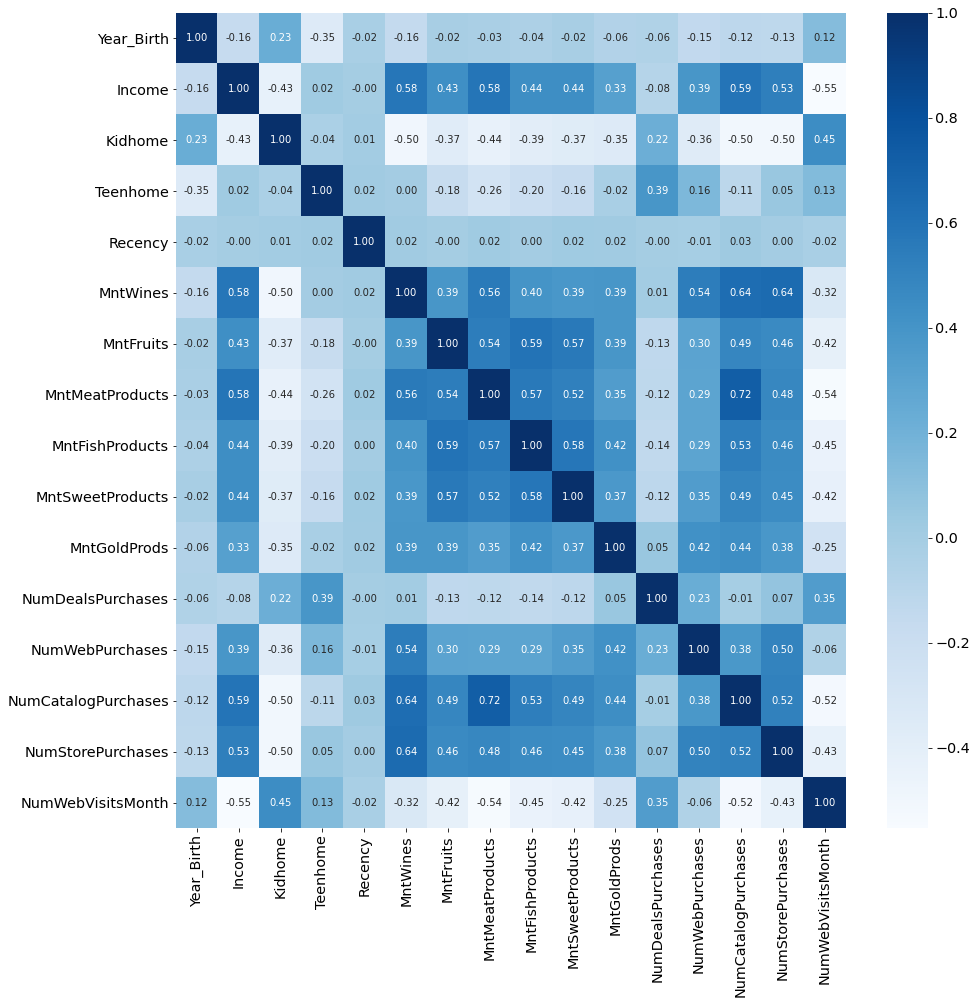

In [34]:
plt.figure(figsize=(15, 15))
sns.heatmap(df[numericals6].corr(), cmap='Blues', annot=True, fmt='.2f')

## feature yg dipertahankan: 
* income, 
* mnt produk (6), 
* jml_anak (gabungan kidhome, teenhome), 
* numpurchase
* numwebvisit


## insight
* income x mnt produk, semuanya hampir diatas 0.44 kecuali mntgold <br>
    semakin tinggi income, semakin tinggi spent produk <br>
* income x numwebpurchase, numcatalogpurchase, numstorepurchase, semuanya diatas 0.53 kecuali numwebpurchase <br>
    semakin tinggi income, semakin tinggi sering beli <br>
    tetapi income tidak ada hubungan dgn numdealspurchase (deal dgn diskon) <br>
* income x numweb, -0.55, semakin tinggi income semakin jarang mengunjungi web  <br> <br>
rekomendasi :
* cmp selanjutnya, ditargetkan terhadap customer dgn income tinggi dan jumlah pembelian produk yang lebih tinggi <br> <br>

* mnt produk saling berkorelasi dg nilai min 0.33, kemungkinan seseorang membeli beberapa produk sekaligus <br>
* mnt produk x numwebpurchase, numcatalogpurchase, numstorepurchase, minimal 0.29, mnt produk berbanding lurus dengan purchase <br>
<br>


# Bivariate Analysis

income x numweb

(0.0, 200000.0)

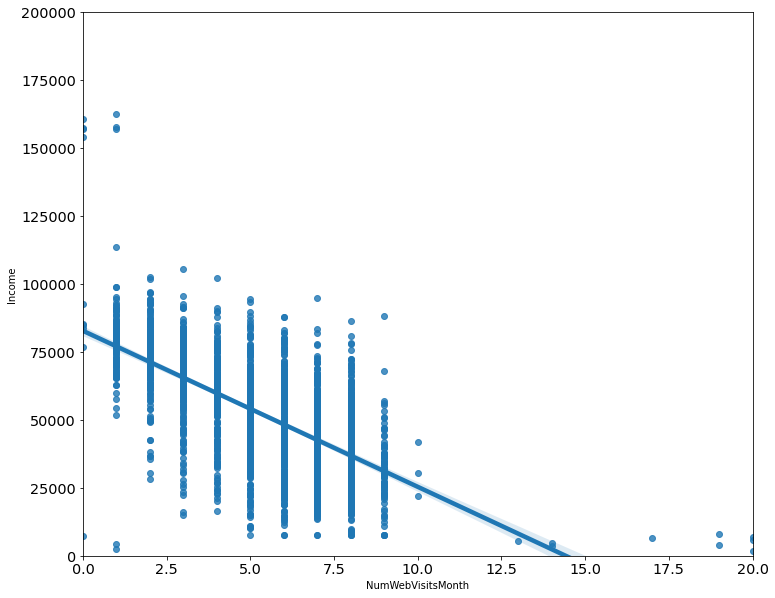

In [35]:
sns.regplot(data=df, x="NumWebVisitsMonth", y="Income", scatter= True)
plt.ylim(0,200000)

income x mnt produk

(0.0, 200000.0)

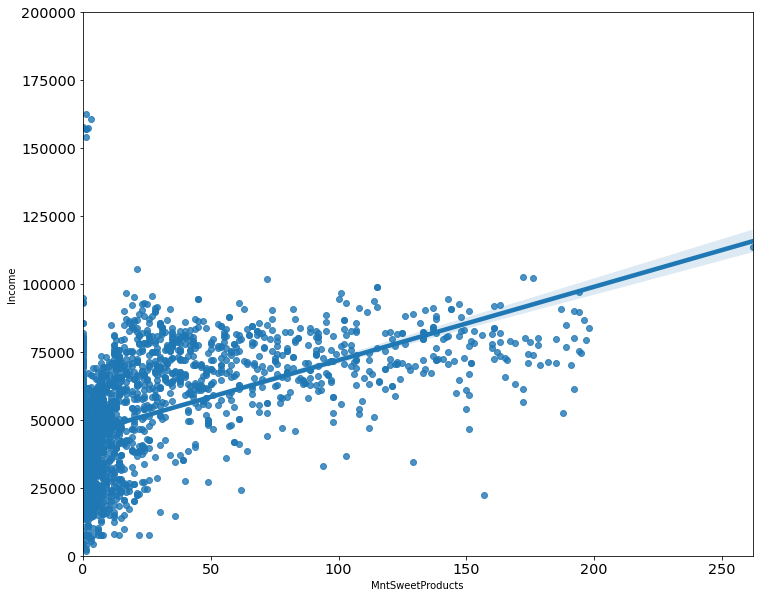

In [36]:
sns.regplot(data=df, x="MntSweetProducts", y="Income", scatter= True)
plt.ylim(0,200000)

income x purchase

(0.0, 200000.0)

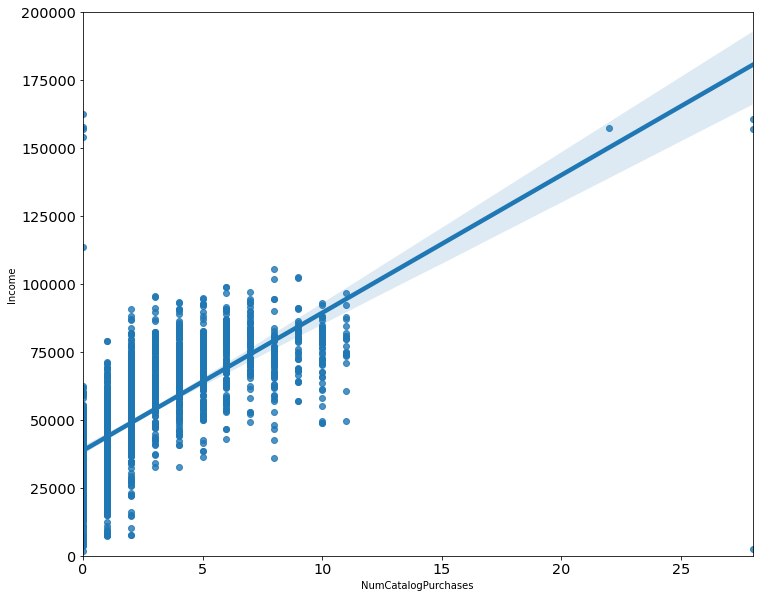

In [37]:
sns.regplot(data=df, x="NumCatalogPurchases", y="Income", scatter= True)
plt.ylim(0,200000)

Korelasi antar mnt produk

<AxesSubplot:xlabel='MntFishProducts', ylabel='MntMeatProducts'>

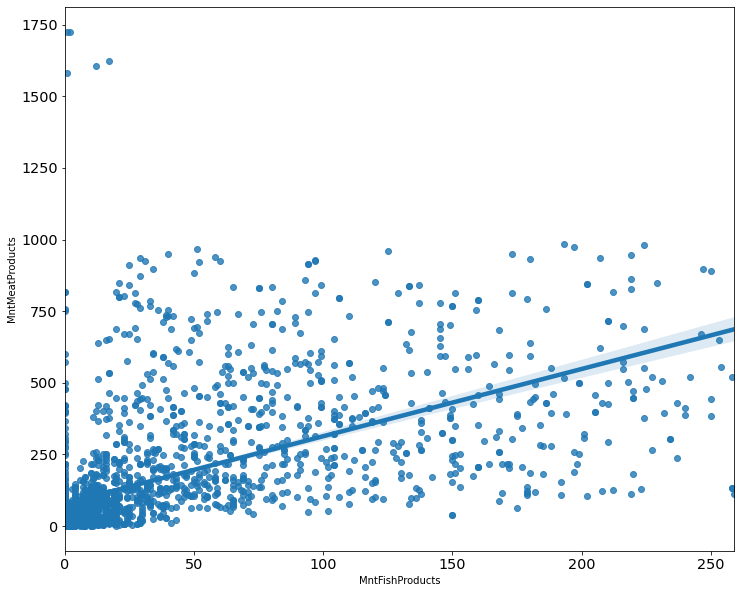

In [38]:
sns.regplot(data=df, x="MntFishProducts", y="MntMeatProducts", scatter= True)
# plt.ylim(0,200000)

## Mulitvariate Analysis

In [39]:
numericals = numericals.drop(['Z_CostContact', 'Z_Revenue'])

In [40]:
print(numericals)
print(categoricals)

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')
Index(['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')


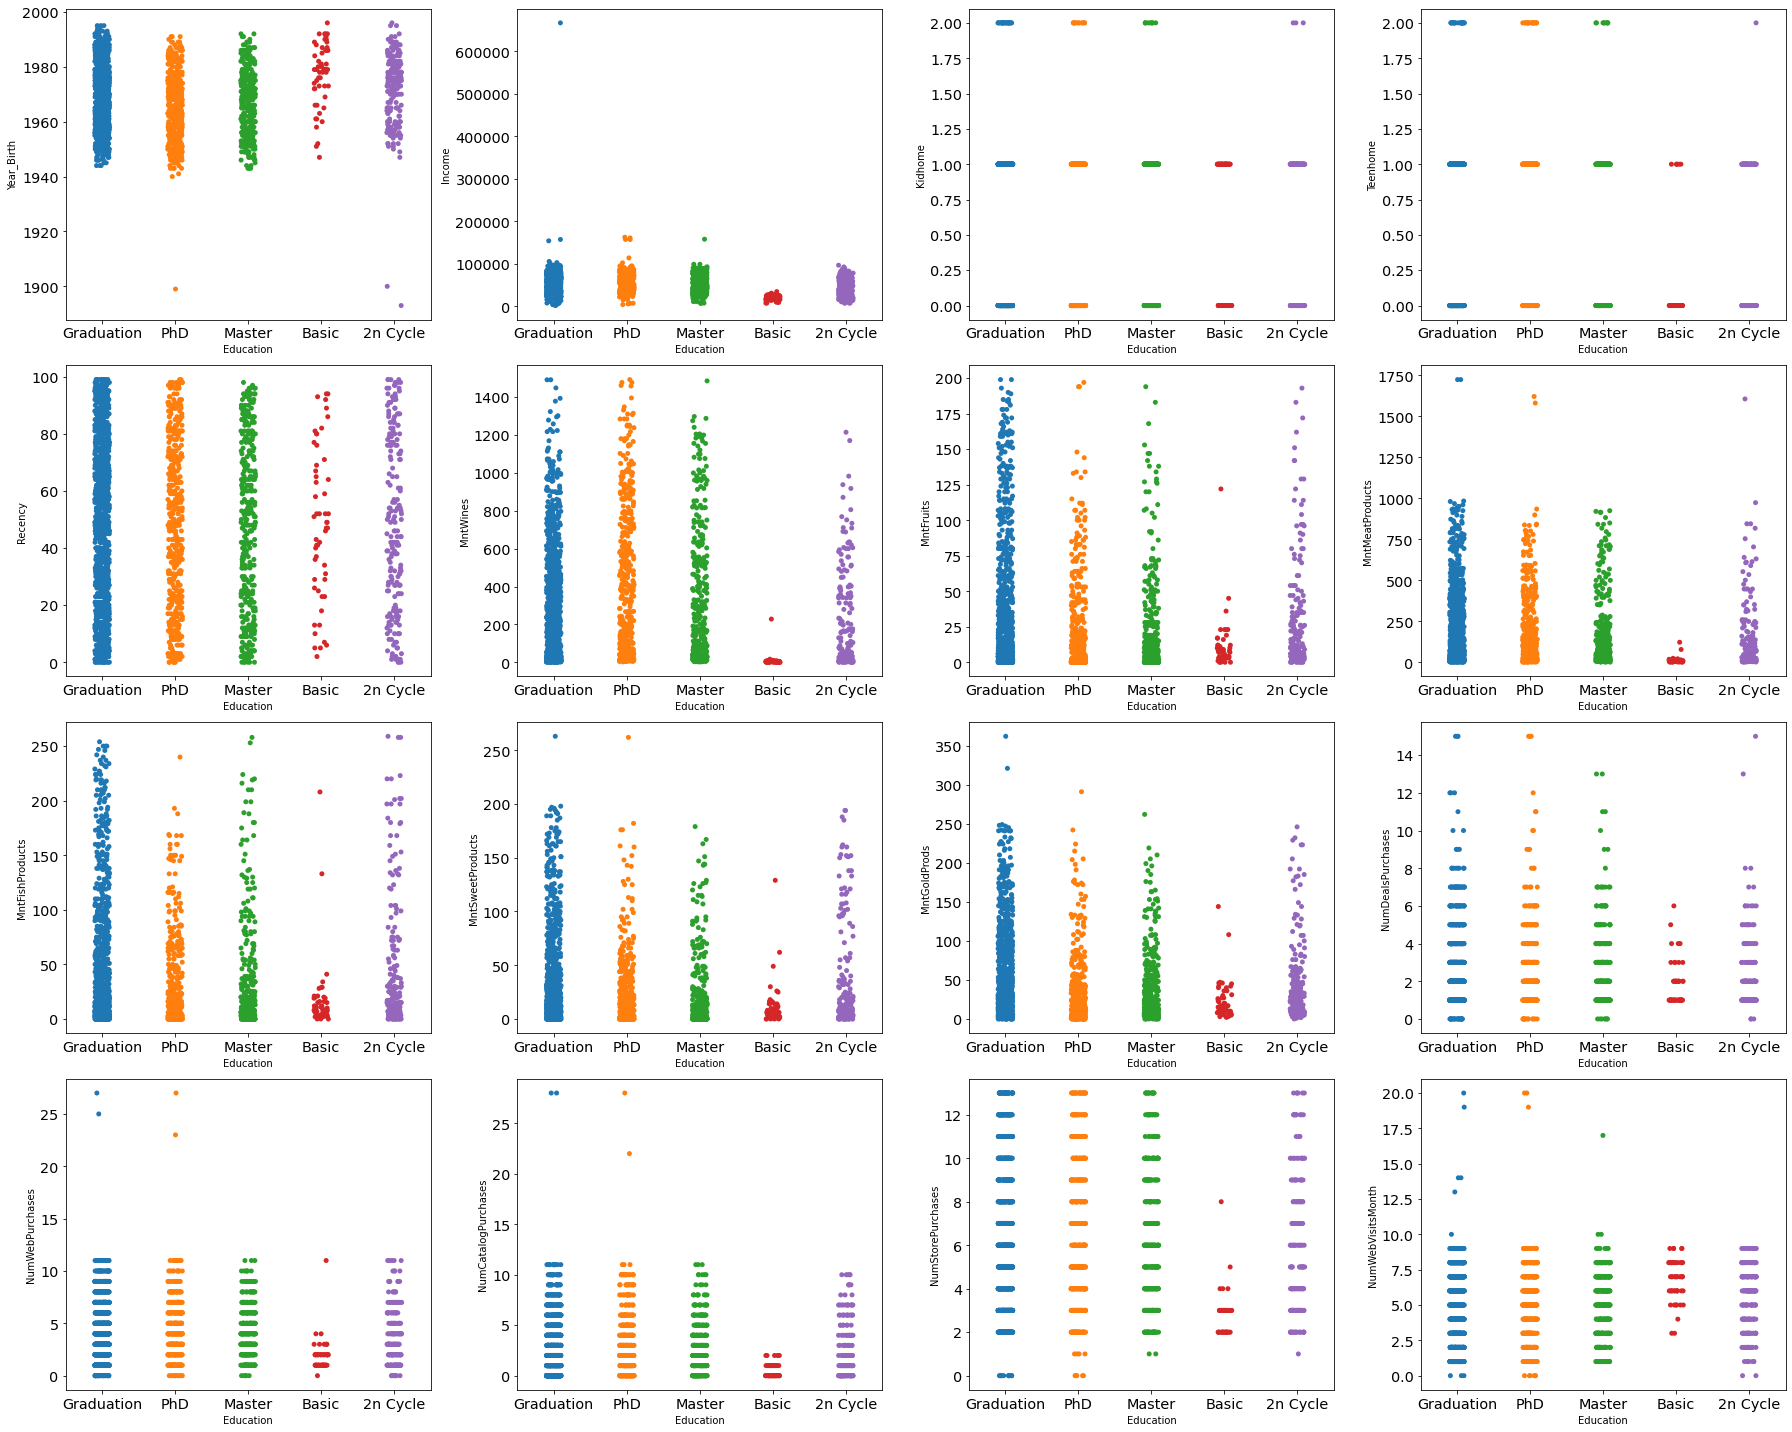

In [41]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(numericals)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Education', y=numericals[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

Insight yang didapat : <br>
* basic memiliki income relative kecil, sedangkan yang lain hampir sama di 100000 <br>
* basic jarang beli (mntproduk, numpurchase, numvisit : kecil)

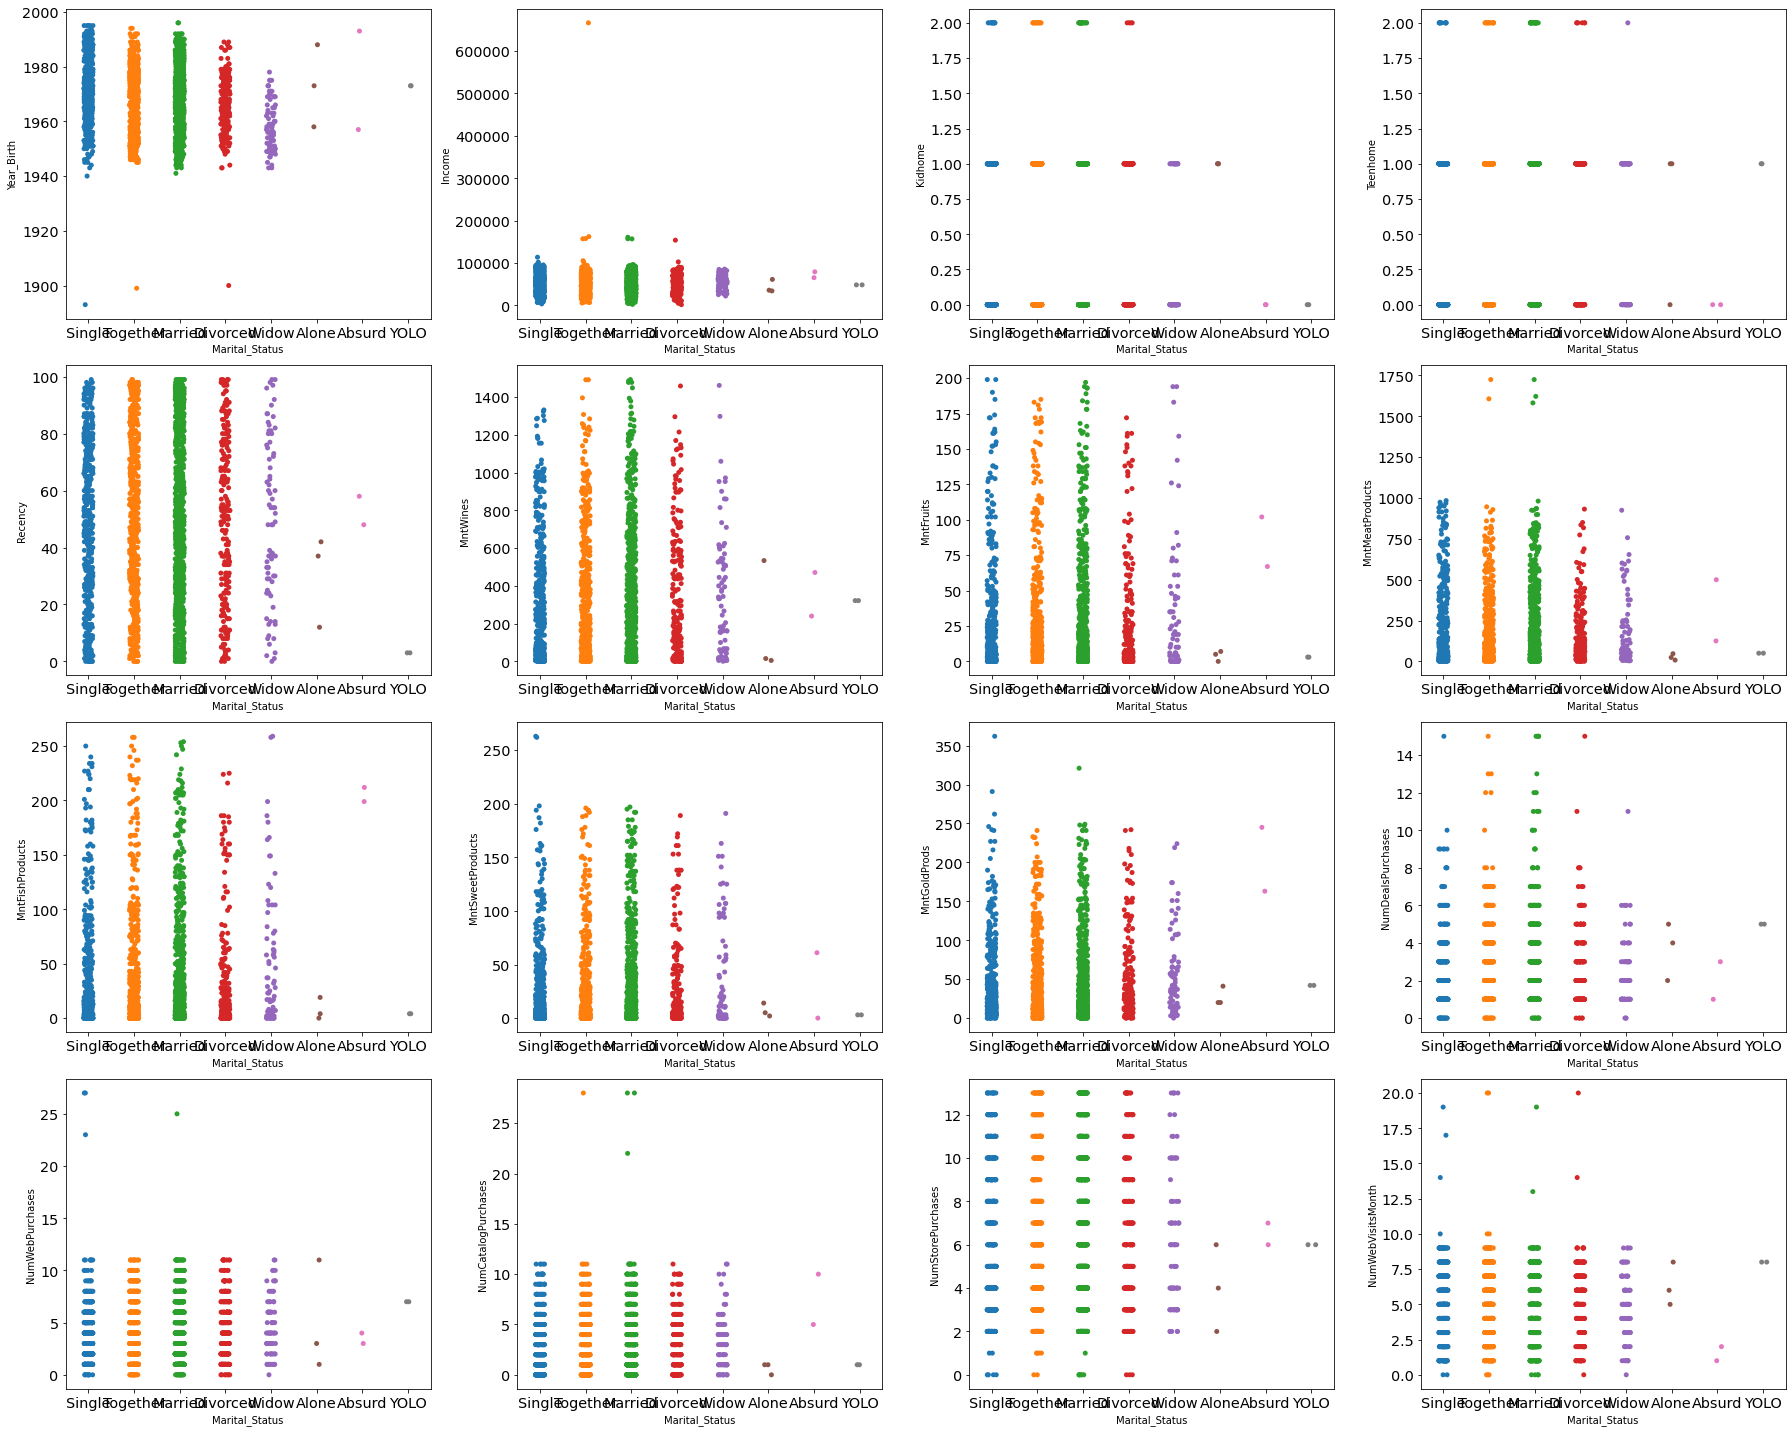

In [42]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(numericals)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Marital_Status', y=numericals[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

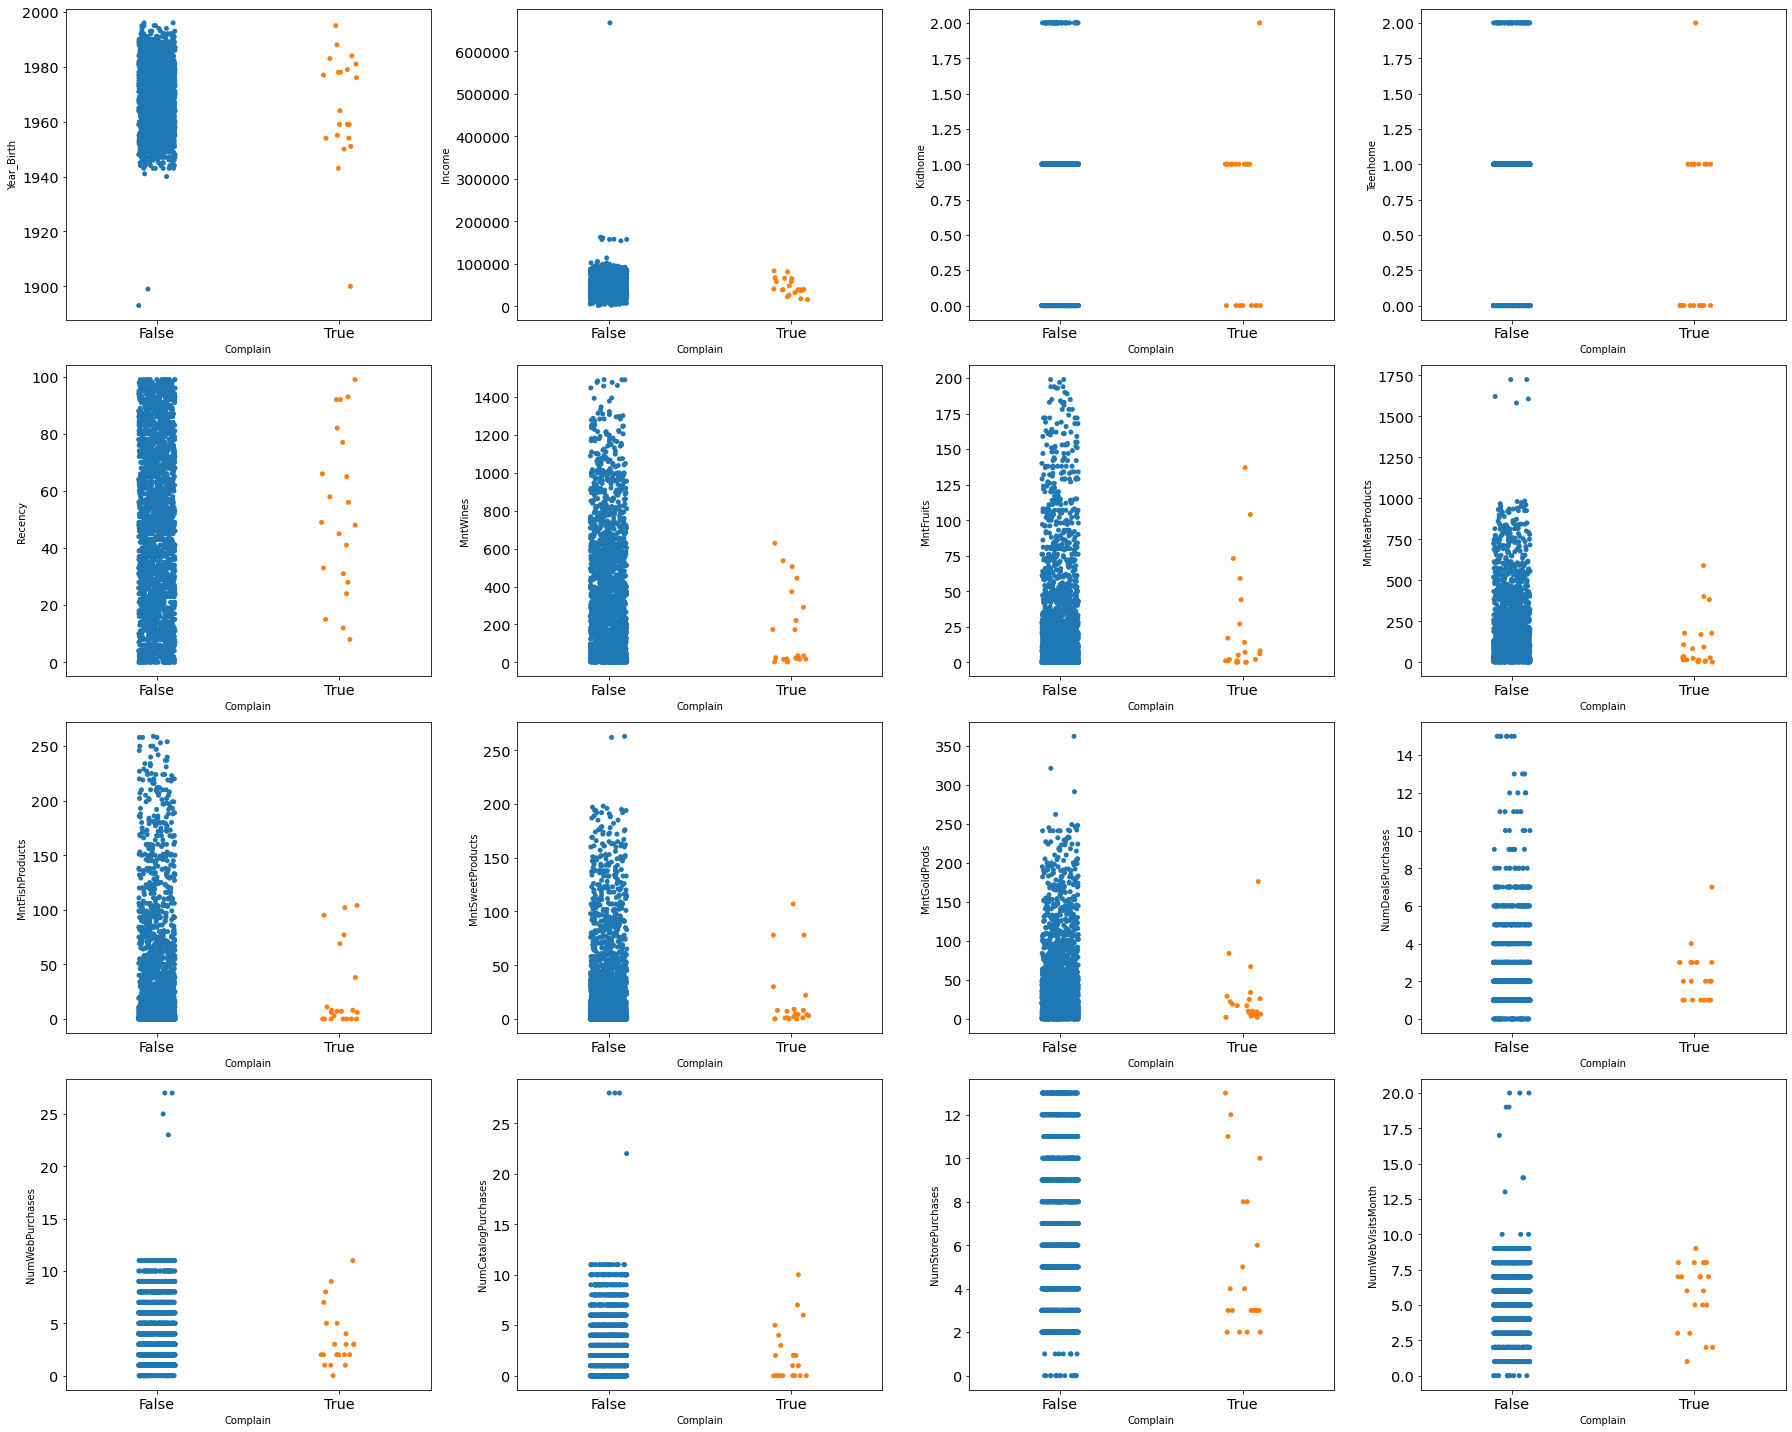

In [43]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(numericals)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Complain', y=numericals[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

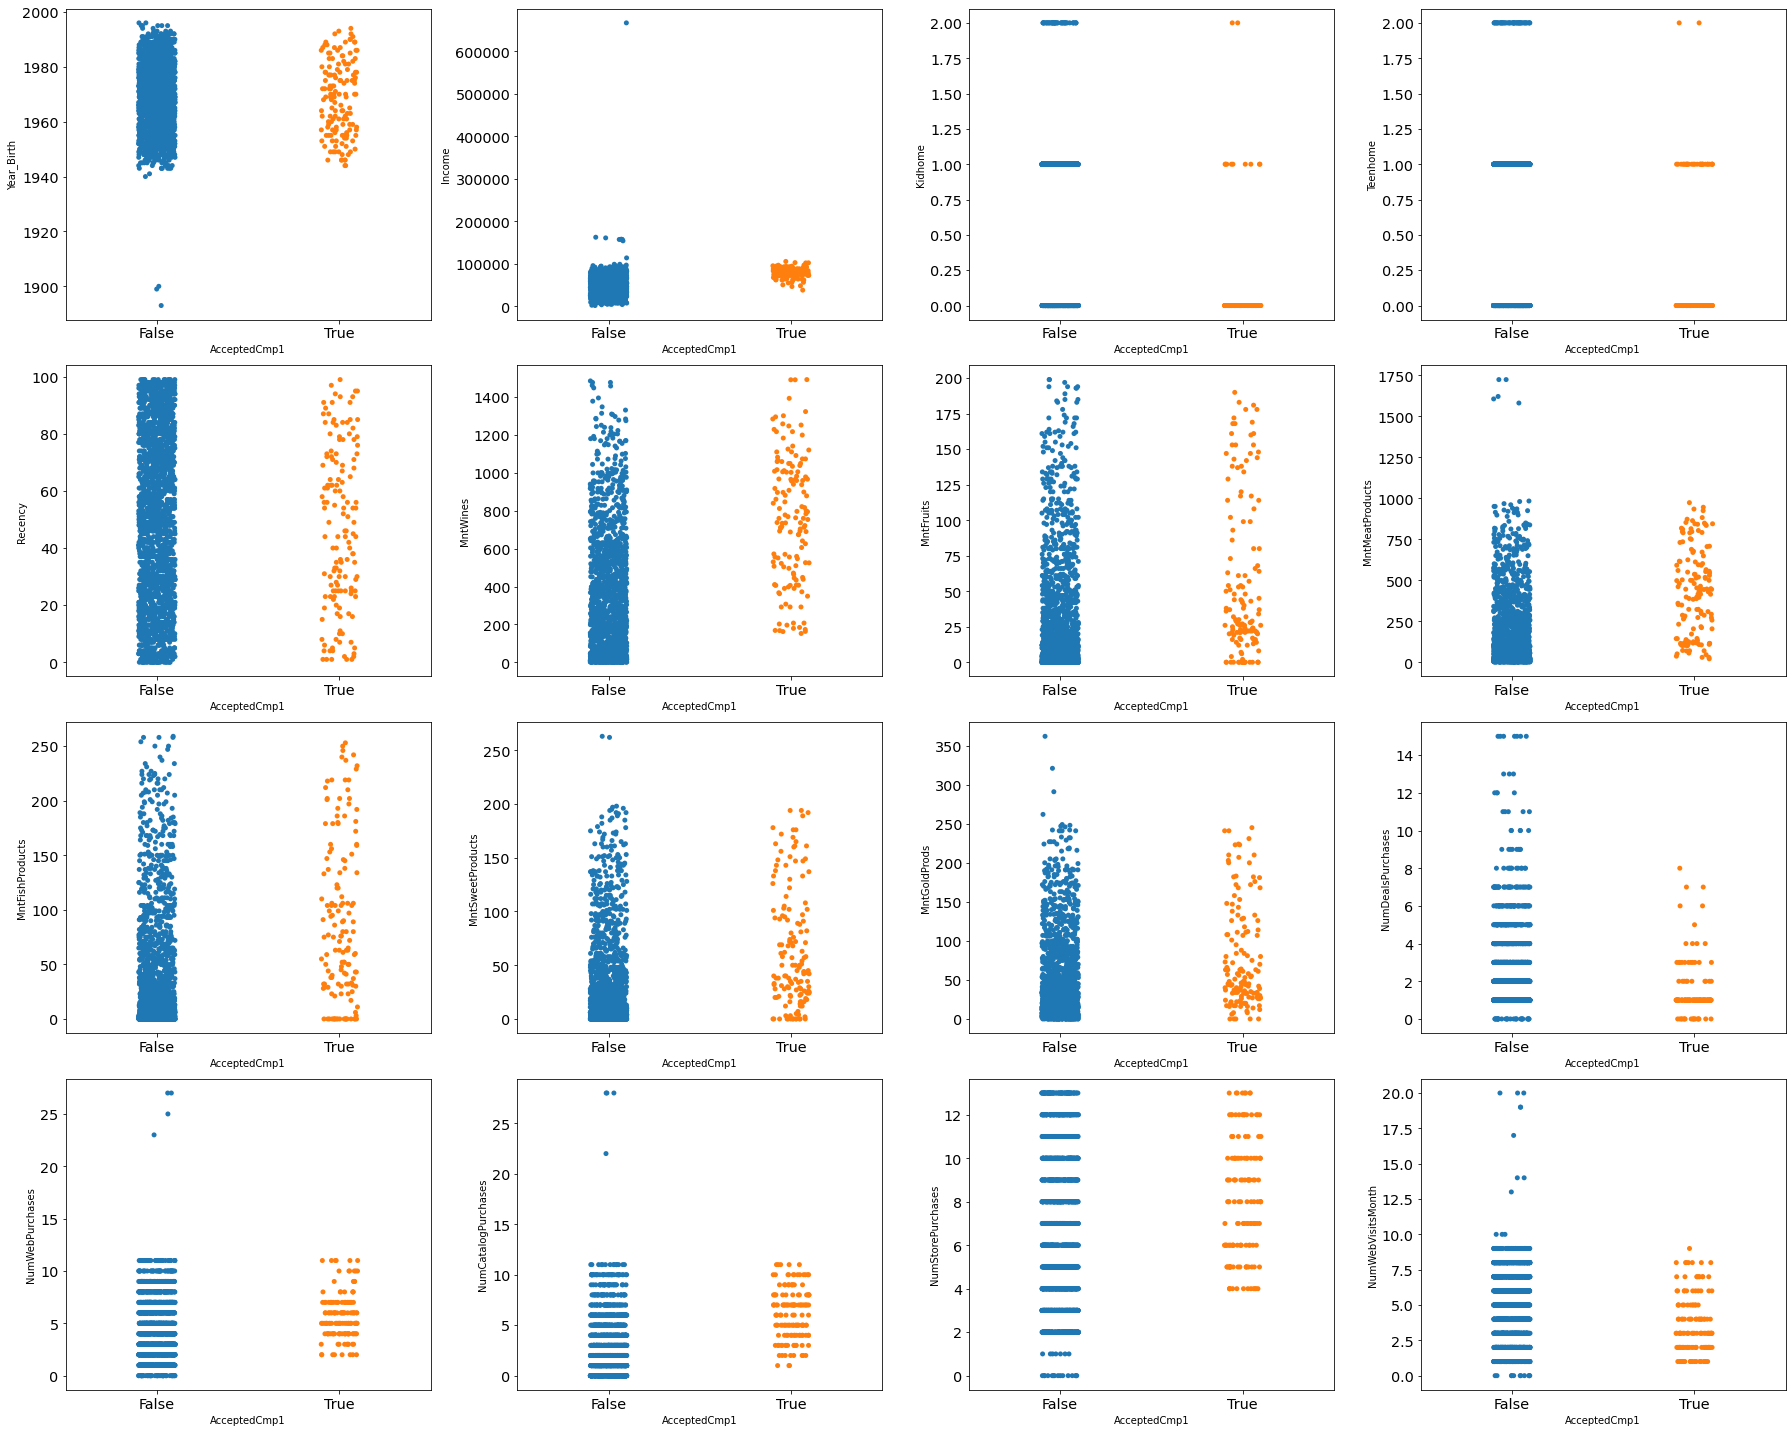

In [44]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(numericals)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='AcceptedCmp1', y=numericals[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

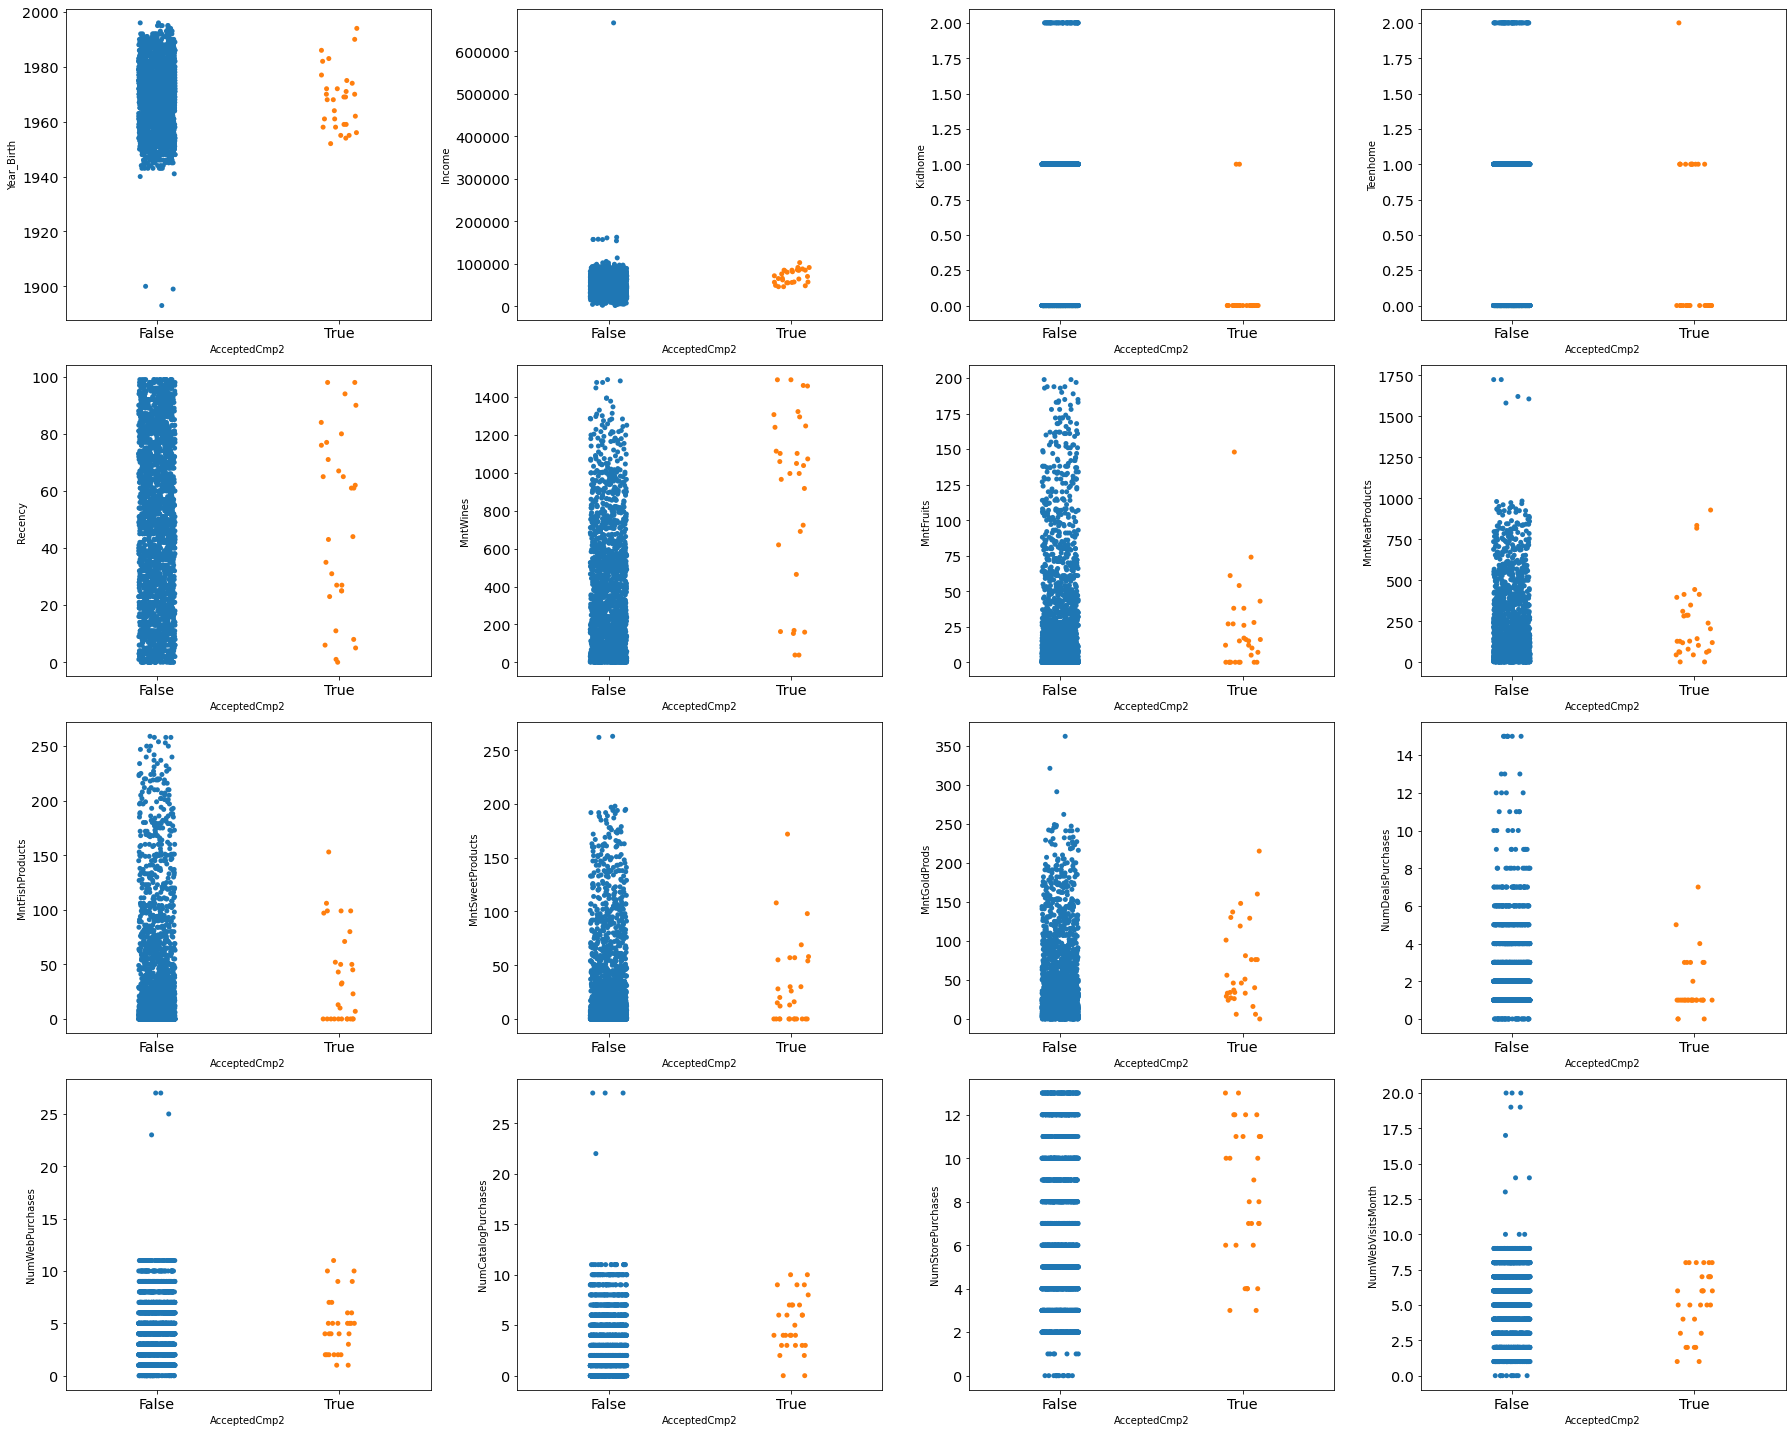

In [45]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(numericals)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='AcceptedCmp2', y=numericals[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

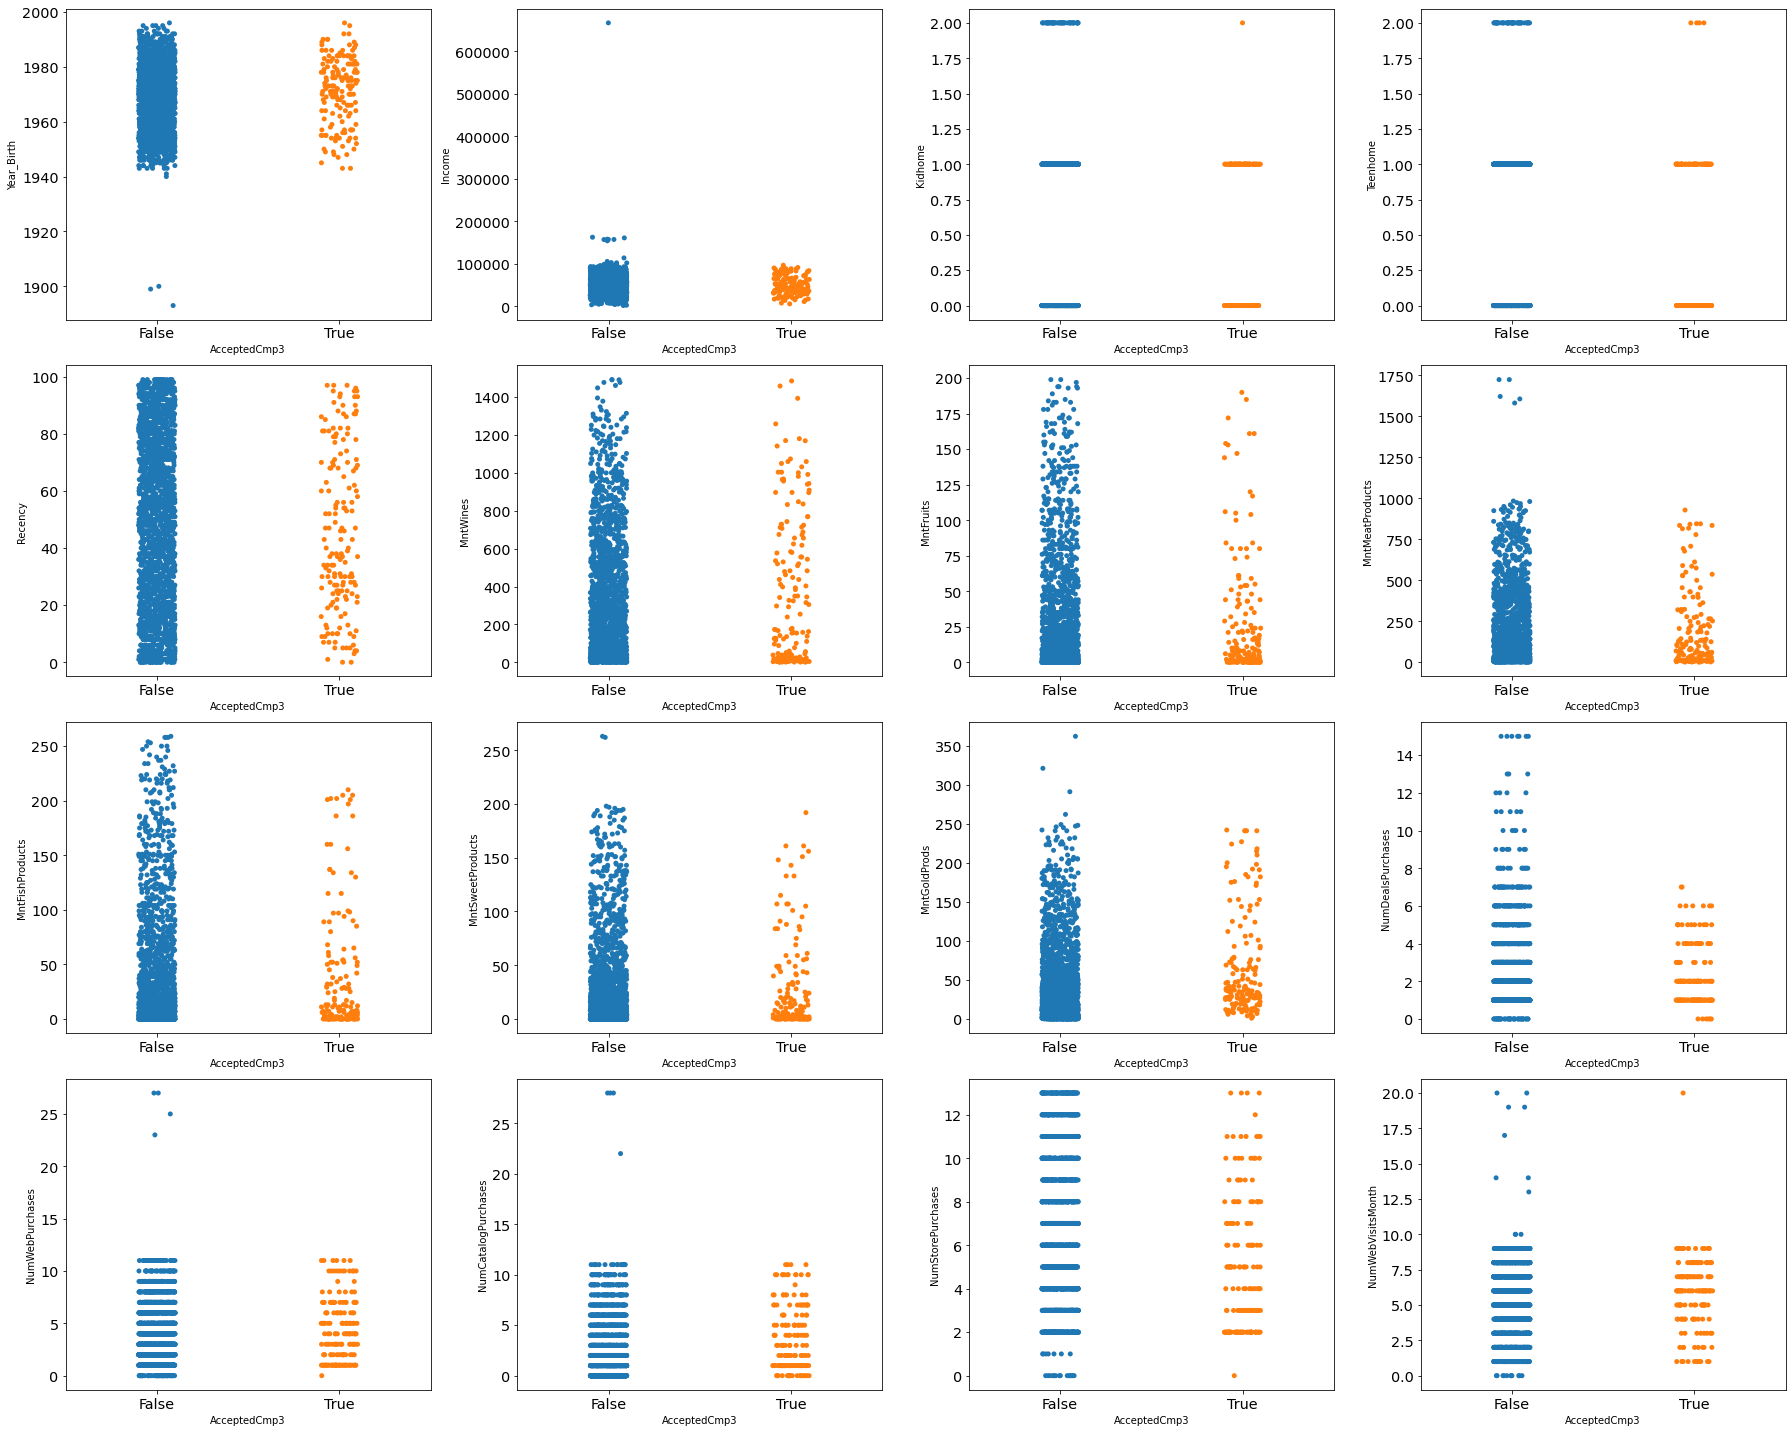

In [46]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(numericals)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='AcceptedCmp3', y=numericals[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

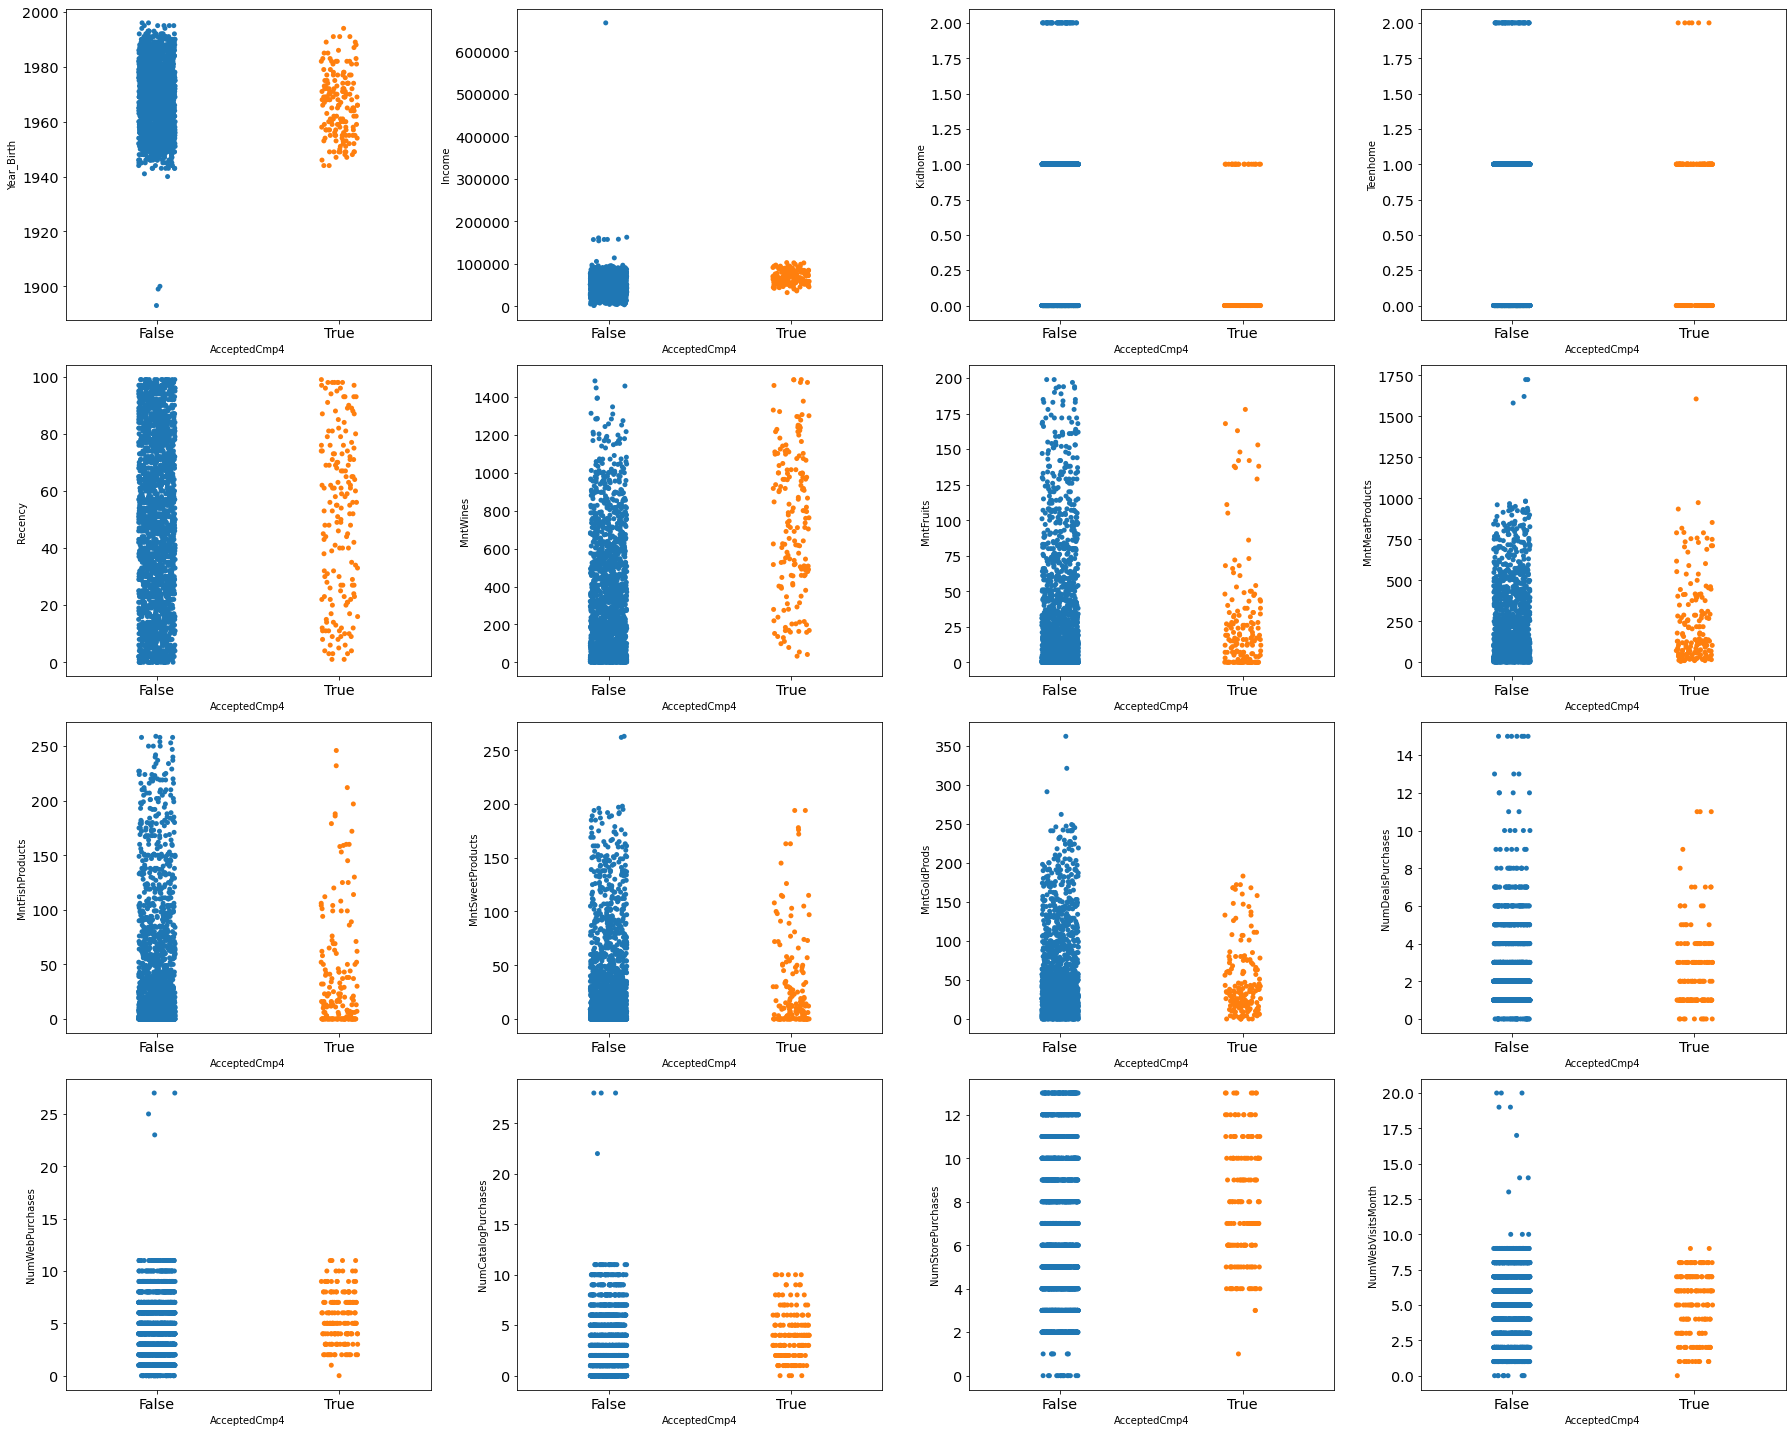

In [47]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(numericals)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='AcceptedCmp4', y=numericals[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

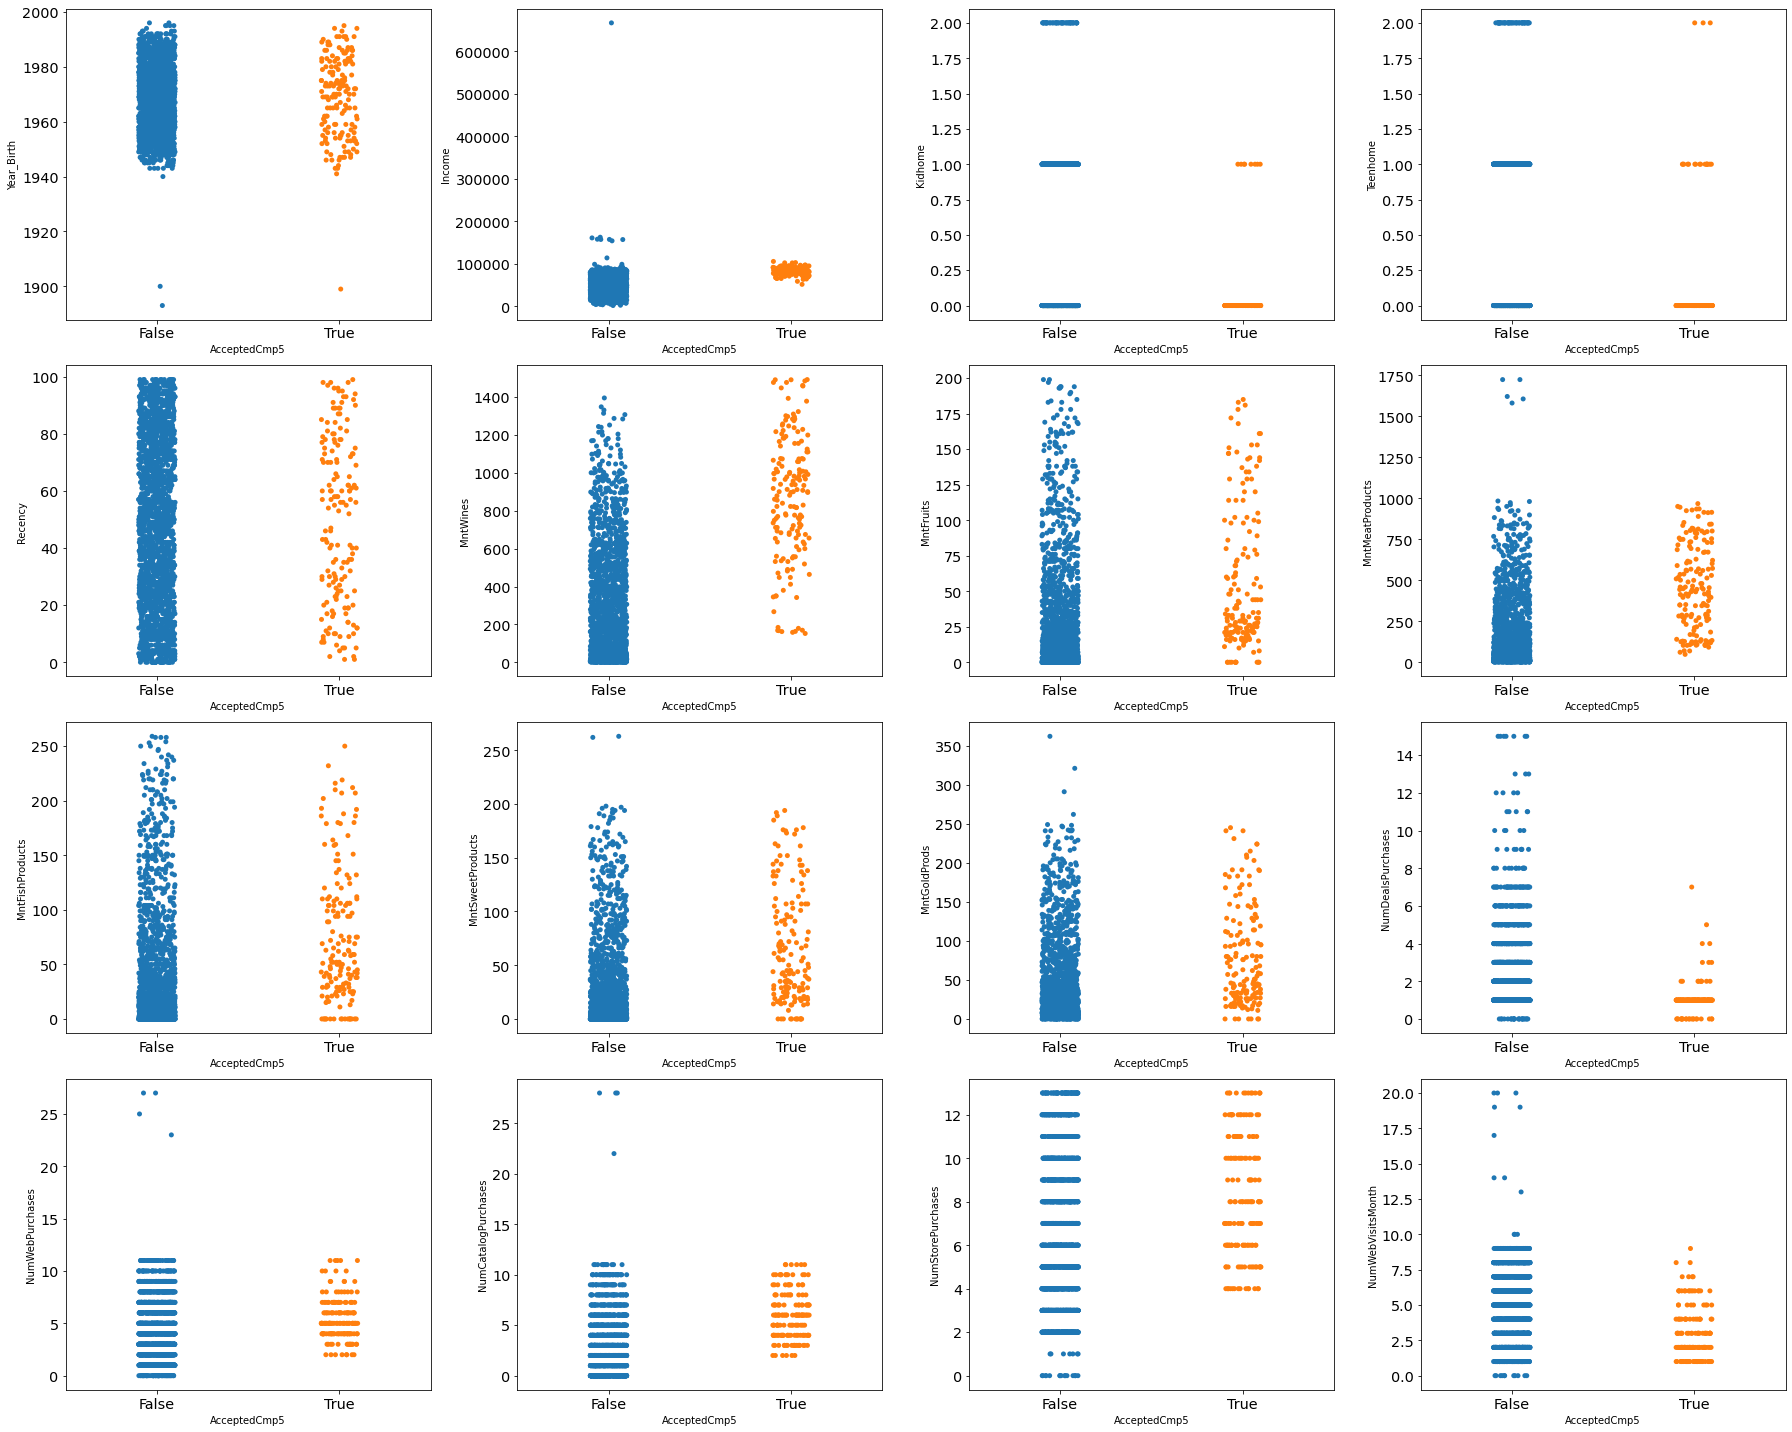

In [48]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(numericals)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='AcceptedCmp5', y=numericals[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

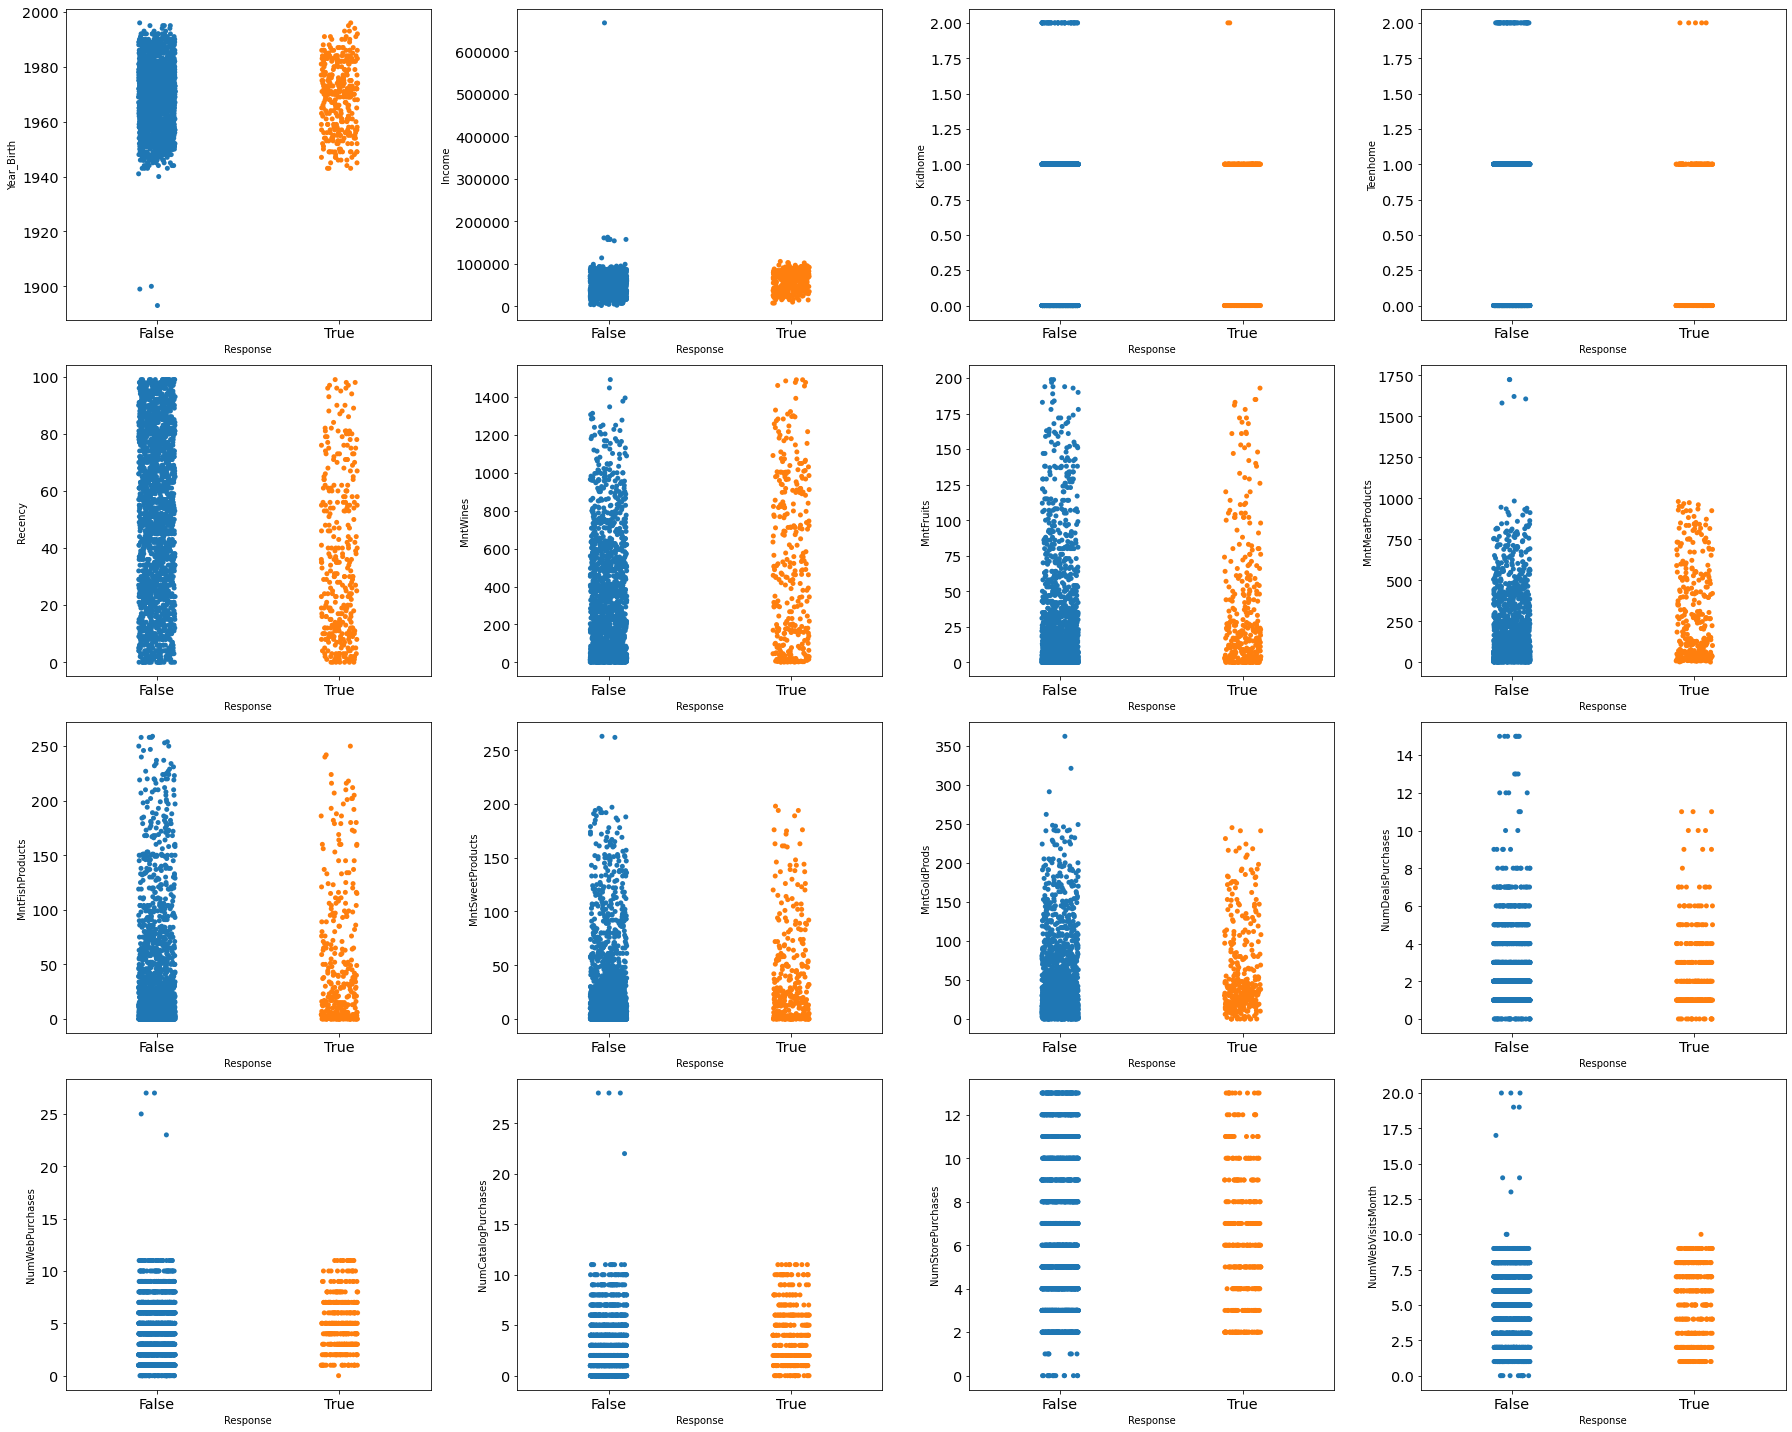

In [49]:
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(numericals)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Response', y=numericals[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

# Jawaban Homework <br>
1. 
A. DT Customer diganti jadi date <br> acptcmp 1-5, response, dan complain diganti jadi boolean <br>
B. Income null <br>

C. summary data
* data yang mean dan median berbeda cukup jauh: Kidhome, Teenhome, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts <br>
* nilai max yang tidak normal: income <br>
* freq pada data education timpang di nilai graduation <br>
* data 2nd cycle dan master itu maksudnya sama
* freq pada data marital status alone, absurd, dan yolo sangat kecil

In [50]:
df[['Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].describe().T

count          mean           std     min       25%  \
Income            2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome           2240.0      0.444196      0.538398     0.0      0.00   
Teenhome          2240.0      0.506250      0.544538     0.0      0.00   
MntWines          2240.0    303.935714    336.597393     0.0     23.75   
MntFruits         2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts   2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts   2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts  2240.0     27.062946     41.280498     0.0      1.00   

                      50%       75%       max  
Income            51381.5  68522.00  666666.0  
Kidhome               0.0      1.00       2.0  
Teenhome              0.0      1.00       2.0  
MntWines            173.5    504.25    1493.0  
MntFruits             8.0     33.00     199.0  
MntMeatProducts      67.0    232.00    1725.0  
MntFishProducts      12.0     50.00     259.0  
MntSweetProducts      8.0     33.00     263.0

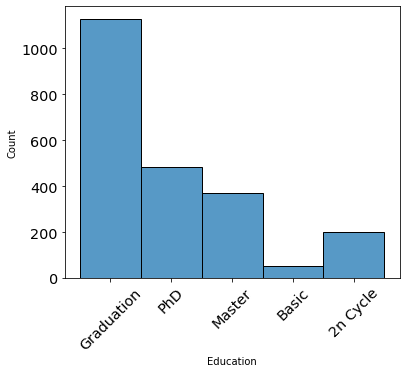

In [51]:
plt.figure(figsize = (6,5))
sns.histplot(data = df, x='Education')
plt.xticks(rotation=45)
plt.show()

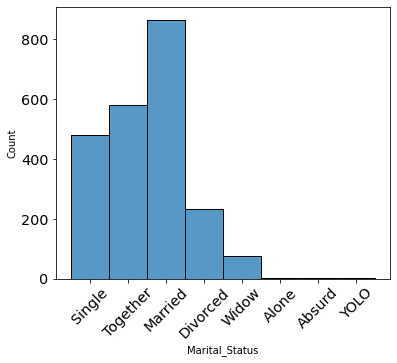

In [52]:
plt.figure(figsize = (6,5))
sns.histplot(data = df, x='Marital_Status')
plt.xticks(rotation=45)
plt.show()

In [53]:
categoricals

Index(['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [54]:
data = ['AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']

In [55]:
df1 = df.groupby(['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'Response']).ID.nunique().reset_index()
df1

AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Response    ID
0          False         False         False     False  1670
1          False         False         False      True   160
2          False         False          True     False    45
3          False         False          True      True    35
4          False          True         False     False    86
5          False          True         False      True    22
6          False          True          True     False    19
7          False          True          True      True    40
8           True         False         False     False    79
9           True         False         False      True    60
10          True         False          True     False     7
11          True         False          True      True    17

2. Distribusi Data : <br>
* year_birth, mean terlihat hampir sama dengan median, tetapi dari boxplot diketahui : negatif skew <br>
* income, mean hampir mendekati median, bisa dianggap normal, grafik cendrung kekiri karena outliers <br>
* kidhome, teenhome : bimodal
* recency : normal <br>
* mnt produk seluruhnya positif skew <br>
* numwebvisitmonth : mean < median, negatif skew <br>
* numwebpurchase : mean hampir sama dengan median, bisa dianggap normal <br>
* selain itu : mean > median, positif skew <br>

3. <br>
A. feature yg dipertahankan: income, mnt produk (6), numweb, num purchase <br>
<br>

B. Data dengan korelasi tinggi : <br>
insight
* income x mnt produk, semuanya hampir diatas 0.44 kecuali mntgold <br>
    semakin tinggi income, semakin tinggi spent produk <br>
* income x numwebpurchase, numcatalogpurchase, numstorepurchase, semuanya diatas 0.53 kecuali numwebpurchase <br>
    semakin tinggi income, semakin tinggi sering beli <br>
    tetapi income tidak ada hubungan dgn numdealspurchase (deal dgn diskon) <br>
* income x numweb, -0.55, semakin tinggi income semakin jarang mengunjungi web  <br> <br>
rekomendasi :
* cmp selanjutnya, ditargetkan terhadap customer dgn income tinggi dan jumlah pembelian produk yang lebih tinggi <br> <br>

* mnt produk saling berkorelasi dg nilai min 0.33, kemungkinan seseorang membeli beberapa produk sekaligus <br>
* mnt produk x numwebpurchase, numcatalogpurchase, numstorepurchase, minimal 0.29, mnt produk berbanding lurus dengan purchase <br>
<br>

4. 
 
insight 1,2,3: <br>
* income x kidhome, -0.43, yang kaya jarang punya anak kecil <br>
* income x mnt produk, semuanya hampir diatas 0.44 kecuali mntgold <br>
    semakin tinggi income, semakin tinggi spent produk <br>
* income x numwebpurchase, numcatalogpurchase, numstorepurchase, semuanya diatas 0.53 kecuali numwebpurchase <br>
    semakin tinggi income, semakin tinggi sering beli <br>
    tetapi income tidak ada hubungan dgn numdealspurchase (deal dgn diskon) <br>
* income x numweb, -0.55, yang kaya jarang belanja online <br> <br>
* income x acp5, 0.34, ada korelasi antara income tinggi dgn acptcmpnya <br>

Insight yang didapat : <br>
* basic memiliki income relative kecil, sedangkan yang lain hampir sama di 100000 <br>
* basic jarang beli (mntproduk, numpurchase, numvisit : kecil) <br>

insight yang didapat : <br>
* customer yg acceptcmp1,2,5, itu minimal sudah datang ke store 3 sampai 4 kali <br>

# Hal yang harus dilakukan untuk bisnis insight

* kurang bukti literasi yang mendukung business insight, karena dari data kurang memenuhi / mencukupi business insight yang didapatkan

# Saran untuk Step2

* modifikasi data null di income, bisa pakai 4 cara: hapus, isi 0, median, dan mean
* drop data duplicate kalau ada
* buang outliers dengan metode z_score, atau iqr, pada data : income, year_birth
* outliers pada mnt produk, dan purchase, numwebvisit harus ditanyakan terlebih dahulu ke mentor
* merubah year_birth jadi age
* melebur data marital_status, sendiri dan berpasangan
* menambahkan jumlah anak dari data teenhome, kidhome
* melebur education, s1, s2, s3, atau yang lainnya (butuh diskusi lanjut)
* data Z_CostContact dan Z_Revenue, dihapus aja karena isinya sama semua
* transformasi data : (butuh diskusi lanjutan)
    * income : log transformation
    * age : standarization
    * mntproduk : 
    * purchase :
* future encoding :
    * marital status
    * education
    * kolom yang boolean